# Промышленность — задача проекта

Чтобы оптимизировать производственные расходы, металлургический комбинат ООО «Так закаляем сталь» решил уменьшить потребление электроэнергии на этапе обработки стали. Вам предстоит построить модель, которая предскажет температуру стали.

### Описание этапа обработки

Сталь обрабатывают в металлическом ковше вместимостью около 100 тонн. Чтобы ковш выдерживал высокие температуры, изнутри его облицовывают огнеупорным кирпичом. Расплавленную сталь заливают в ковш и подогревают до нужной температуры графитовыми электродами. Они установлены в крышке ковша. 

Из сплава выводится сера (десульфурация), добавлением примесей корректируется химический состав и отбираются пробы. Сталь легируют — изменяют её состав — подавая куски сплава из бункера для сыпучих материалов или проволоку через специальный трайб-аппарат (англ. tribe, «масса»).

Перед тем как первый раз ввести легирующие добавки, измеряют температуру стали и производят её химический анализ. Потом температуру на несколько минут повышают, добавляют легирующие материалы и продувают сплав инертным газом. Затем его перемешивают и снова проводят измерения. Такой цикл повторяется до достижения целевого химического состава и оптимальной температуры плавки.

Тогда расплавленная сталь отправляется на доводку металла или поступает в машину непрерывной разливки. Оттуда готовый продукт выходит в виде заготовок-слябов (англ. *slab*, «плита»).

### Описание данных

Данные состоят из файлов, полученных из разных источников:

- `data_arc_new.csv` — данные об электродах;
- `data_bulk_new.csv` — данные о подаче сыпучих материалов (объём);
- `data_bulk_time_new.csv` *—* данные о подаче сыпучих материалов (время);
- `data_gas_new.csv` — данные о продувке сплава газом;
- `data_temp_new.csv` — результаты измерения температуры;
- `data_wire_new.csv` — данные о проволочных материалах (объём);
- `data_wire_time_new.csv` — данные о проволочных материалах (время).

Во всех файлах столбец `key` содержит номер партии. В файлах может быть несколько строк с одинаковым значением `key`: они соответствуют разным итерациям обработки.

# Цель проекта

Необходимо оптимизировать производственные расходы на металлургическом комбинате ООО «Так закаляем сталь» и для этого небходимо построить несколько моделей, которые предскажут температуру стали, выбрать лучшую и проверить ее на тренеровочной выборке.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_arc_new = pd.read_csv('/datasets/data_arc_new.csv')
data_bulk_new = pd.read_csv('/datasets/data_bulk_new.csv')
data_bulk_time_new = pd.read_csv('/datasets/data_bulk_time_new.csv')
data_gas_new = pd.read_csv('/datasets/data_gas_new.csv')
data_temp_new = pd.read_csv('/datasets/data_temp_new.csv')
data_wire_new = pd.read_csv('/datasets/data_wire_new.csv')
data_wire_time_new = pd.read_csv('/datasets/data_wire_time_new.csv')

In [3]:
def show_info(data_frame):
    print(data_frame.info())
    display(data_frame)
    for column in data_frame.columns:
        print('Уникальные значения столбца', column)
        print(data_frame[column].sort_values().unique())

2.1 Данные об электродах

In [4]:
show_info(data_arc_new)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14876 entries, 0 to 14875
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   key                   14876 non-null  int64  
 1   Начало нагрева дугой  14876 non-null  object 
 2   Конец нагрева дугой   14876 non-null  object 
 3   Активная мощность     14876 non-null  float64
 4   Реактивная мощность   14876 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 581.2+ KB
None


,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.305130,0.211253
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.765658,0.477438
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.580313,0.430460
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,0.518496,0.379979
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.867133,0.643691
...,...,...,...,...,...
14871,3241,2019-09-06 16:49:05,2019-09-06 16:51:42,0.439735,0.299579
14872,3241,2019-09-06 16:55:11,2019-09-06 16:58:11,0.646498,0.458240
14873,3241,2019-09-06 17:06:48,2019-09-06 17:09:52,1.039726,0.769302
14874,3241,2019-09-06 17:21:58,2019-09-06 17:22:55,0.530267,0.361543


Уникальные значения столбца key
[   1    2    3 ... 3239 3240 3241]
Уникальные значения столбца Начало нагрева дугой
['2019-05-03 11:02:14' '2019-05-03 11:07:28' '2019-05-03 11:11:44' ...
 '2019-09-06 17:06:48' '2019-09-06 17:21:58' '2019-09-06 17:24:54']
Уникальные значения столбца Конец нагрева дугой
['2019-05-03 11:06:02' '2019-05-03 11:10:33' '2019-05-03 11:14:36' ...
 '2019-09-06 17:09:52' '2019-09-06 17:22:55' '2019-09-06 17:26:15']
Уникальные значения столбца Активная мощность
[0.22312  0.223238 0.223895 ... 1.444904 1.458773 1.463773]
Уникальные значения столбца Реактивная мощность
[-7.15479924e+02  1.53777000e-01  1.53921000e-01 ...  1.22306300e+00
  1.25862800e+00  1.27028400e+00]


In [5]:
len(data_arc_new['key'].unique())

3214

In [6]:
data_arc_new['key'].value_counts()

2108    16
1689    15
1513    15
2567    14
46      13
        ..
977      1
247      1
2582     1
248      1
530      1
Name: key, Length: 3214, dtype: int64

count    14876.000000
mean         0.662752
std          0.258885
min          0.223120
25%          0.467115
50%          0.599587
75%          0.830070
max          1.463773
Name: Активная мощность, dtype: float64

<AxesSubplot:>

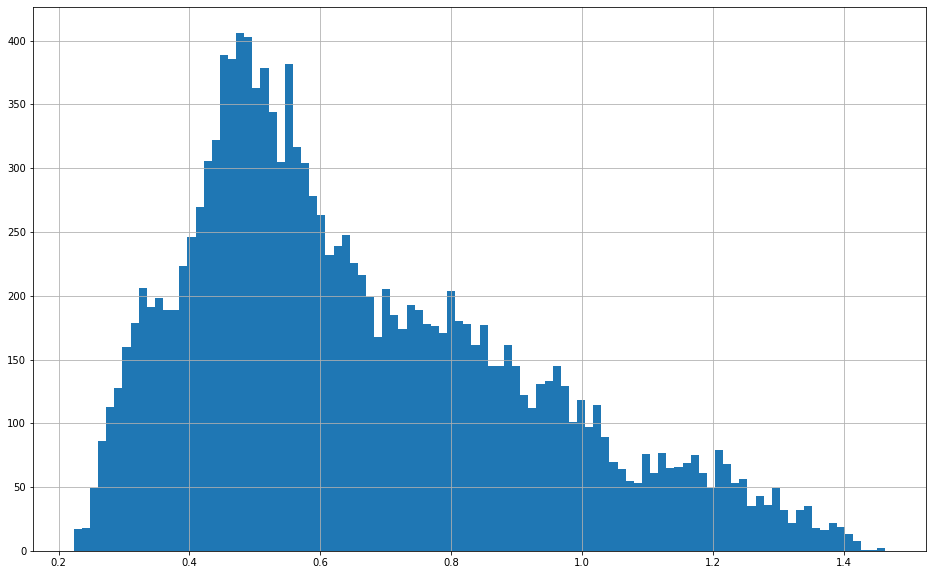

In [7]:
display(data_arc_new['Активная мощность'].describe())
data_arc_new['Активная мощность'].hist(bins=100, figsize=(16,10))

count    14876.000000
mean         0.438986
std          5.873485
min       -715.479924
25%          0.337175
50%          0.441639
75%          0.608201
max          1.270284
Name: Реактивная мощность, dtype: float64

count    14875.000000
mean         0.487115
std          0.197612
min          0.153777
25%          0.337190
50%          0.441665
75%          0.608223
max          1.270284
Name: Реактивная мощность, dtype: float64

<AxesSubplot:>

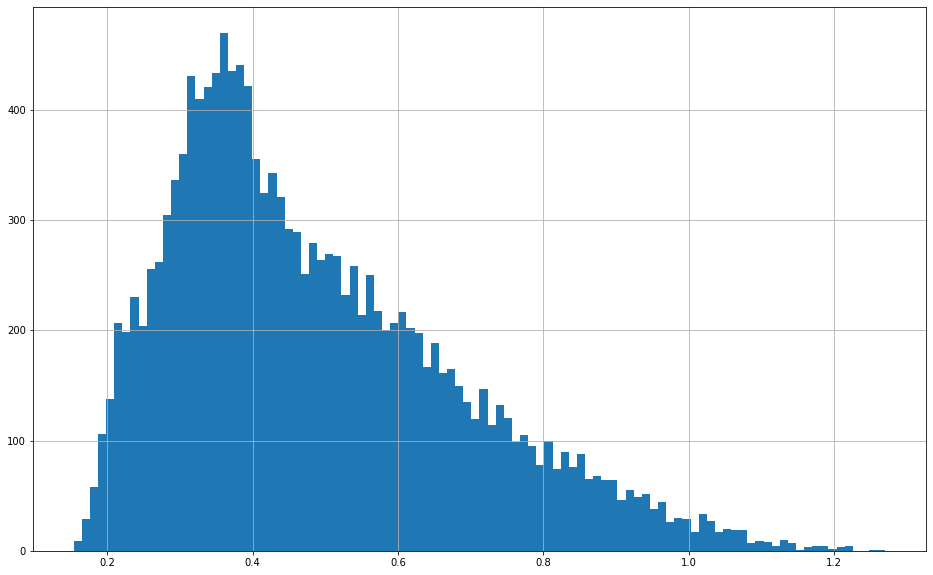

In [8]:
display(data_arc_new['Реактивная мощность'].describe())
display(data_arc_new[data_arc_new['Реактивная мощность'] > 0]['Реактивная мощность'].describe())
data_arc_new[data_arc_new['Реактивная мощность'] > 0]['Реактивная мощность'].hist(bins=100, figsize=(16,10))

2.2 данные о подаче сыпучих материалов (объём)

In [9]:
show_info(data_bulk_new)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   key      3129 non-null   int64  
 1   Bulk 1   252 non-null    float64
 2   Bulk 2   22 non-null     float64
 3   Bulk 3   1298 non-null   float64
 4   Bulk 4   1014 non-null   float64
 5   Bulk 5   77 non-null     float64
 6   Bulk 6   576 non-null    float64
 7   Bulk 7   25 non-null     float64
 8   Bulk 8   1 non-null      float64
 9   Bulk 9   19 non-null     float64
 10  Bulk 10  176 non-null    float64
 11  Bulk 11  177 non-null    float64
 12  Bulk 12  2450 non-null   float64
 13  Bulk 13  18 non-null     float64
 14  Bulk 14  2806 non-null   float64
 15  Bulk 15  2248 non-null   float64
dtypes: float64(15), int64(1)
memory usage: 391.2 KB
None


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,150.0,154.0
1,2,NaN,NaN,NaN,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,149.0,154.0
2,3,NaN,NaN,NaN,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,205.0,NaN,152.0,153.0
3,4,NaN,NaN,NaN,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,207.0,NaN,153.0,154.0
4,5,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203.0,NaN,151.0,152.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3124,3237,NaN,NaN,170.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,252.0,NaN,130.0,206.0
3125,3238,NaN,NaN,126.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,254.0,NaN,108.0,106.0
3126,3239,NaN,NaN,NaN,NaN,NaN,114.0,NaN,NaN,NaN,NaN,NaN,158.0,NaN,270.0,88.0
3127,3240,NaN,NaN,NaN,NaN,NaN,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,192.0,54.0


Уникальные значения столбца key
[   1    2    3 ... 3239 3240 3241]
Уникальные значения столбца Bulk 1
[ 10.  16.  19.  21.  22.  24.  26.  27.  28.  29.  30.  31.  32.  33.
  34.  36.  37.  38.  39.  41.  43.  44.  46.  47.  48.  50.  51.  52.
  54.  58.  60.  62.  63.  65.  67.  69.  73.  74.  75.  78.  83.  90.
  92.  94. 104. 118. 185.  nan]
Уникальные значения столбца Bulk 2
[228. 232. 233. 236. 242. 246. 247. 248. 249. 254. 257. 258. 270. 282.
 325.  nan]
Уникальные значения столбца Bulk 3
[  6.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.  29.
  30.  31.  32.  34.  36.  37.  38.  39.  40.  41.  42.  43.  44.  45.
  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.  56.  57.  58.  59.
  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.  70.  71.  72.  73.
  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.  84.  85.  86.  87.
  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.  98.  99. 100. 101.
 102. 103. 104. 105. 106. 107. 108. 109. 110. 111. 112. 113. 114. 115.
 1

In [10]:
len(data_bulk_new['key'].unique())

3129

In [11]:
data_bulk_new['key'].value_counts()

2049    1
2612    1
2588    1
541     1
2590    1
       ..
1090    1
3139    1
1092    1
3141    1
2047    1
Name: key, Length: 3129, dtype: int64

Bulk 1


count    252.000000
mean      39.242063
std       18.277654
min       10.000000
25%       27.000000
50%       31.000000
75%       46.000000
max      185.000000
Name: Bulk 1, dtype: float64

Bulk 2


count     22.000000
mean     253.045455
std       21.180578
min      228.000000
25%      242.000000
50%      251.500000
75%      257.750000
max      325.000000
Name: Bulk 2, dtype: float64

Bulk 3


count    1298.000000
mean      113.879045
std        75.483494
min         6.000000
25%        58.000000
50%        97.500000
75%       152.000000
max       454.000000
Name: Bulk 3, dtype: float64

Bulk 4


count    1014.000000
mean      104.394477
std        48.184126
min        12.000000
25%        72.000000
50%       102.000000
75%       133.000000
max       281.000000
Name: Bulk 4, dtype: float64

Bulk 5


count     77.000000
mean     107.025974
std       81.790646
min       11.000000
25%       70.000000
50%       86.000000
75%      132.000000
max      603.000000
Name: Bulk 5, dtype: float64

Bulk 6


count    576.000000
mean     118.925347
std       72.057776
min       17.000000
25%       69.750000
50%      100.000000
75%      157.000000
max      503.000000
Name: Bulk 6, dtype: float64

Bulk 7


count     25.000000
mean     305.600000
std      191.022904
min       47.000000
25%      155.000000
50%      298.000000
75%      406.000000
max      772.000000
Name: Bulk 7, dtype: float64

Bulk 8


count     1.0
mean     49.0
std       NaN
min      49.0
25%      49.0
50%      49.0
75%      49.0
max      49.0
Name: Bulk 8, dtype: float64

Bulk 9


count     19.000000
mean      76.315789
std       21.720581
min       63.000000
25%       66.000000
50%       68.000000
75%       70.500000
max      147.000000
Name: Bulk 9, dtype: float64

Bulk 10


count    176.000000
mean      83.284091
std       26.060347
min       24.000000
25%       64.000000
50%       86.500000
75%      102.000000
max      159.000000
Name: Bulk 10, dtype: float64

Bulk 11


count    177.000000
mean      76.819209
std       59.655365
min        8.000000
25%       25.000000
50%       64.000000
75%      106.000000
max      313.000000
Name: Bulk 11, dtype: float64

Bulk 12


count    2450.000000
mean      260.471020
std       120.649269
min        53.000000
25%       204.000000
50%       208.000000
75%       316.000000
max      1849.000000
Name: Bulk 12, dtype: float64

Bulk 13


count     18.000000
mean     181.111111
std       46.088009
min      151.000000
25%      153.250000
50%      155.500000
75%      203.500000
max      305.000000
Name: Bulk 13, dtype: float64

Bulk 14


count    2806.000000
mean      170.284747
std        65.868652
min        16.000000
25%       119.000000
50%       151.000000
75%       205.750000
max       636.000000
Name: Bulk 14, dtype: float64

Bulk 15


count    2248.000000
mean      160.513345
std        51.765319
min         1.000000
25%       105.000000
50%       160.000000
75%       205.000000
max       405.000000
Name: Bulk 15, dtype: float64

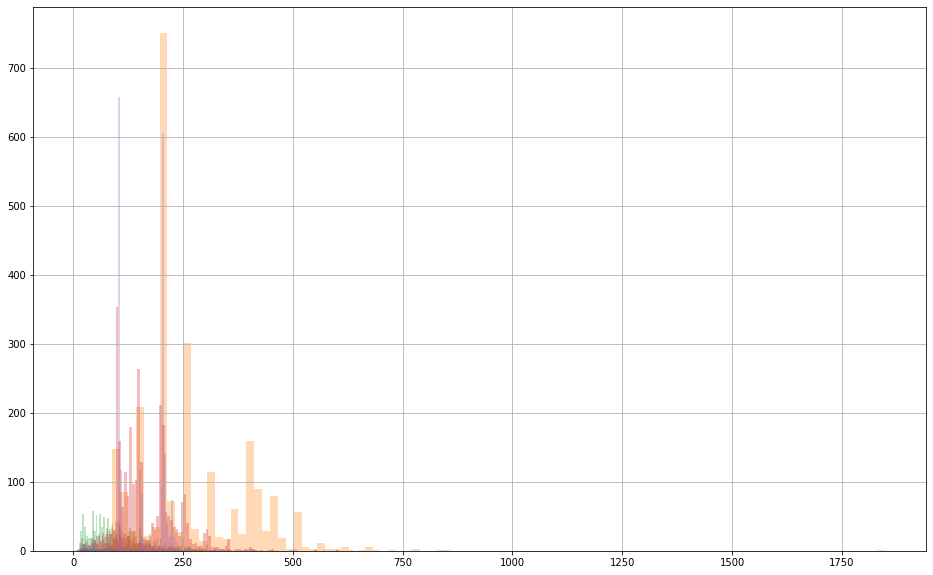

In [12]:
for column in data_bulk_new.columns:
    if column[0] == 'B':
        print(column)
        display(data_bulk_new[column].describe())
        data_bulk_new[column].hist(bins=100, figsize=(16,10), alpha=0.3)

2.3 данные о подаче сыпучих материалов (время)

In [13]:
show_info(data_bulk_time_new)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   key      3129 non-null   int64 
 1   Bulk 1   252 non-null    object
 2   Bulk 2   22 non-null     object
 3   Bulk 3   1298 non-null   object
 4   Bulk 4   1014 non-null   object
 5   Bulk 5   77 non-null     object
 6   Bulk 6   576 non-null    object
 7   Bulk 7   25 non-null     object
 8   Bulk 8   1 non-null      object
 9   Bulk 9   19 non-null     object
 10  Bulk 10  176 non-null    object
 11  Bulk 11  177 non-null    object
 12  Bulk 12  2450 non-null   object
 13  Bulk 13  18 non-null     object
 14  Bulk 14  2806 non-null   object
 15  Bulk 15  2248 non-null   object
dtypes: int64(1), object(15)
memory usage: 391.2+ KB
None


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,2019-05-03 11:28:48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:24:31,NaN,2019-05-03 11:14:50,2019-05-03 11:10:43
1,2,NaN,NaN,NaN,2019-05-03 11:36:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:53:30,NaN,2019-05-03 11:48:37,2019-05-03 11:44:39
2,3,NaN,NaN,NaN,2019-05-03 12:32:39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:27:13,NaN,2019-05-03 12:21:01,2019-05-03 12:16:16
3,4,NaN,NaN,NaN,2019-05-03 12:43:22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:58:00,NaN,2019-05-03 12:51:11,2019-05-03 12:46:36
4,5,NaN,NaN,NaN,2019-05-03 13:30:47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 13:30:47,NaN,2019-05-03 13:34:12,2019-05-03 13:30:47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3124,3237,NaN,NaN,2019-09-06 11:54:15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-09-06 11:49:45,NaN,2019-09-06 11:45:22,2019-09-06 11:40:06
3125,3238,NaN,NaN,2019-09-06 12:26:52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-09-06 12:18:35,NaN,2019-09-06 12:31:49,2019-09-06 12:26:52
3126,3239,NaN,NaN,NaN,NaN,NaN,2019-09-06 15:06:00,NaN,NaN,NaN,NaN,NaN,2019-09-06 15:01:44,NaN,2019-09-06 14:58:15,2019-09-06 14:48:06
3127,3240,NaN,NaN,NaN,NaN,NaN,2019-09-06 16:24:28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-09-06 16:07:29,2019-09-06 16:01:34


Уникальные значения столбца key
[   1    2    3 ... 3239 3240 3241]
Уникальные значения столбца Bulk 1
['2019-05-03 17:42:46' '2019-05-05 16:26:52' '2019-05-05 17:18:36'
 '2019-05-05 18:32:50' '2019-05-05 19:34:07' '2019-05-05 20:36:08'
 '2019-05-05 21:41:07' '2019-05-05 22:07:40' '2019-05-06 03:19:35'
 '2019-05-07 17:37:05' '2019-05-07 22:54:29' '2019-05-08 01:46:58'
 '2019-05-08 01:53:35' '2019-05-08 09:50:17' '2019-05-08 14:10:47'
 '2019-05-08 18:38:10' '2019-05-08 19:41:48' '2019-05-08 20:35:02'
 '2019-05-09 00:10:01' '2019-05-09 14:14:29' '2019-05-11 03:53:30'
 '2019-05-11 03:58:38' '2019-05-11 06:21:38' '2019-05-11 07:01:15'
 '2019-05-11 22:08:02' '2019-05-11 23:59:58' '2019-05-12 04:52:28'
 '2019-05-13 03:00:10' '2019-05-13 04:58:40' '2019-05-13 09:44:14'
 '2019-05-14 01:20:24' '2019-05-14 02:50:28' '2019-05-14 23:59:20'
 '2019-05-15 02:23:25' '2019-05-15 04:41:54' '2019-05-15 10:09:57'
 '2019-05-15 23:03:53' '2019-05-16 03:29:05' '2019-05-16 10:36:08'
 '2019-05-16 12:14:14' '20

In [14]:
len(data_bulk_time_new['key'].unique())

3129

In [15]:
data_bulk_time_new['key'].value_counts()

2049    1
2612    1
2588    1
541     1
2590    1
       ..
1090    1
3139    1
1092    1
3141    1
2047    1
Name: key, Length: 3129, dtype: int64

2.4 данные о продувке сплава газом

In [16]:
show_info(data_gas_new)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3239 entries, 0 to 3238
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3239 non-null   int64  
 1   Газ 1   3239 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 50.7 KB
None


,key,Газ 1
0,1,29.749986
1,2,12.555561
2,3,28.554793
3,4,18.841219
4,5,5.413692
...,...,...
3234,3237,5.543905
3235,3238,6.745669
3236,3239,16.023518
3237,3240,11.863103


Уникальные значения столбца key
[   1    2    3 ... 3239 3240 3241]
Уникальные значения столбца Газ 1
[8.39852910e-03 1.66956024e-02 2.63028954e-01 ... 5.21423726e+01
 6.09356892e+01 7.79950397e+01]


In [17]:
len(data_gas_new['key'].unique())

3239

In [18]:
data_gas_new['key'].value_counts()

2049    1
3135    1
3115    1
1070    1
3119    1
       ..
2596    1
549     1
2600    1
553     1
2047    1
Name: key, Length: 3239, dtype: int64

count    3239.000000
mean       11.002062
std         6.220327
min         0.008399
25%         7.043089
50%         9.836267
75%        13.769915
max        77.995040
Name: Газ 1, dtype: float64

<AxesSubplot:>

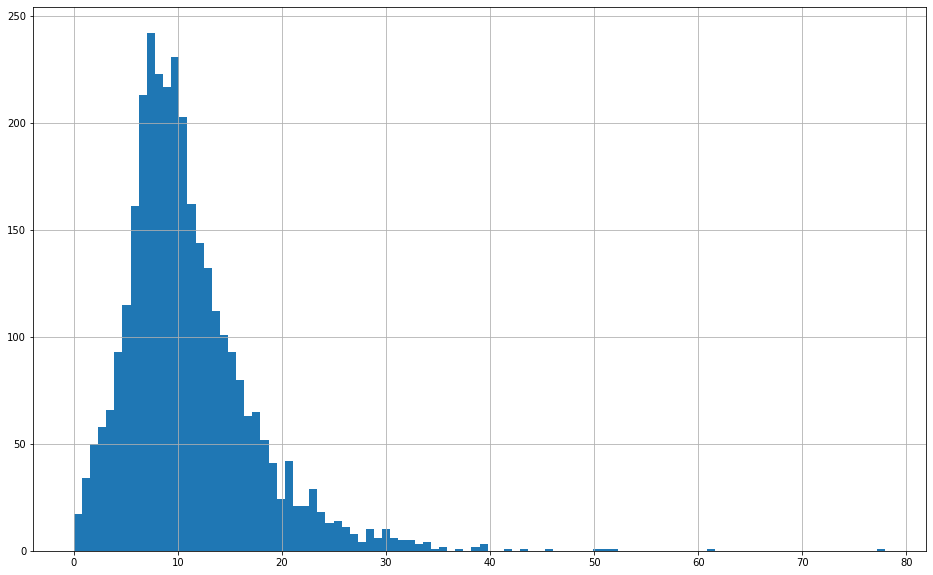

In [19]:
display(data_gas_new['Газ 1'].describe())
data_gas_new['Газ 1'].hist(bins=100, figsize=(16,10))

2.5 результаты измерения температуры

In [20]:
show_info(data_temp_new)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18092 entries, 0 to 18091
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   key           18092 non-null  int64  
 1   Время замера  18092 non-null  object 
 2   Температура   14665 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 424.2+ KB
None


,key,Время замера,Температура
0,1,2019-05-03 11:02:04,1571.0
1,1,2019-05-03 11:07:18,1604.0
2,1,2019-05-03 11:11:34,1618.0
3,1,2019-05-03 11:18:04,1601.0
4,1,2019-05-03 11:25:59,1606.0
...,...,...,...
18087,3241,2019-09-06 16:55:01,NaN
18088,3241,2019-09-06 17:06:38,NaN
18089,3241,2019-09-06 17:21:48,NaN
18090,3241,2019-09-06 17:24:44,NaN


Уникальные значения столбца key
[   1    2    3 ... 3239 3240 3241]
Уникальные значения столбца Время замера
['2019-05-03 11:02:04' '2019-05-03 11:07:18' '2019-05-03 11:11:34' ...
 '2019-09-06 17:21:48' '2019-09-06 17:24:44' '2019-09-06 17:30:05']
Уникальные значения столбца Температура
[1191. 1204. 1208. 1218. 1227. 1515. 1519. 1520. 1521. 1522. 1525. 1526.
 1527. 1528. 1529. 1530. 1531. 1532. 1533. 1534. 1535. 1536. 1537. 1538.
 1539. 1540. 1541. 1542. 1543. 1544. 1545. 1546. 1547. 1548. 1549. 1550.
 1551. 1552. 1553. 1554. 1555. 1556. 1557. 1558. 1559. 1560. 1561. 1562.
 1563. 1564. 1565. 1566. 1567. 1568. 1569. 1570. 1571. 1572. 1573. 1574.
 1575. 1576. 1577. 1578. 1579. 1580. 1581. 1582. 1583. 1584. 1585. 1586.
 1587. 1588. 1589. 1590. 1591. 1592. 1593. 1594. 1595. 1596. 1597. 1598.
 1599. 1600. 1601. 1602. 1603. 1604. 1605. 1606. 1607. 1608. 1609. 1610.
 1611. 1612. 1613. 1614. 1615. 1616. 1617. 1618. 1619. 1620. 1621. 1622.
 1623. 1624. 1625. 1626. 1627. 1628. 1629. 1630. 1631. 

In [21]:
len(data_temp_new['key'].unique())

3216

In [22]:
data_temp_new['key'].value_counts()

2108    17
1513    16
1689    16
2567    15
322     14
        ..
556      2
1169     2
732      2
195      1
279      1
Name: key, Length: 3216, dtype: int64

In [23]:
data_temp_new.tail(15)

,key,Время замера,Температура
18077,3239,2019-09-06 14:59:25,NaN
18078,3239,2019-09-06 15:03:35,NaN
18079,3239,2019-09-06 15:09:55,NaN
18080,3240,2019-09-06 15:25:21,1617.0
18081,3240,2019-09-06 15:30:52,NaN
18082,3240,2019-09-06 15:58:35,NaN
18083,3240,2019-09-06 16:02:31,NaN
18084,3240,2019-09-06 16:21:44,NaN
18085,3240,2019-09-06 16:35:26,NaN
18086,3241,2019-09-06 16:48:55,1586.0


In [24]:
data_temp_new[data_temp_new['Температура'].isnull()].head()

,key,Время замера,Температура
13927,2500,2019-08-10 14:13:11,NaN
13928,2500,2019-08-10 14:18:12,NaN
13929,2500,2019-08-10 14:25:53,NaN
13930,2500,2019-08-10 14:29:39,NaN
13932,2501,2019-08-10 14:49:15,NaN


In [25]:
data_temp_new[data_temp_new['Температура'].isnull()].tail()

,key,Время замера,Температура
18087,3241,2019-09-06 16:55:01,NaN
18088,3241,2019-09-06 17:06:38,NaN
18089,3241,2019-09-06 17:21:48,NaN
18090,3241,2019-09-06 17:24:44,NaN
18091,3241,2019-09-06 17:30:05,NaN


Начиная с партии 2500, пропущенны все значения температуры, кроме первого измерения

count    14665.000000
mean      1590.722741
std         20.394381
min       1191.000000
25%       1580.000000
50%       1590.000000
75%       1599.000000
max       1705.000000
Name: Температура, dtype: float64

<AxesSubplot:>

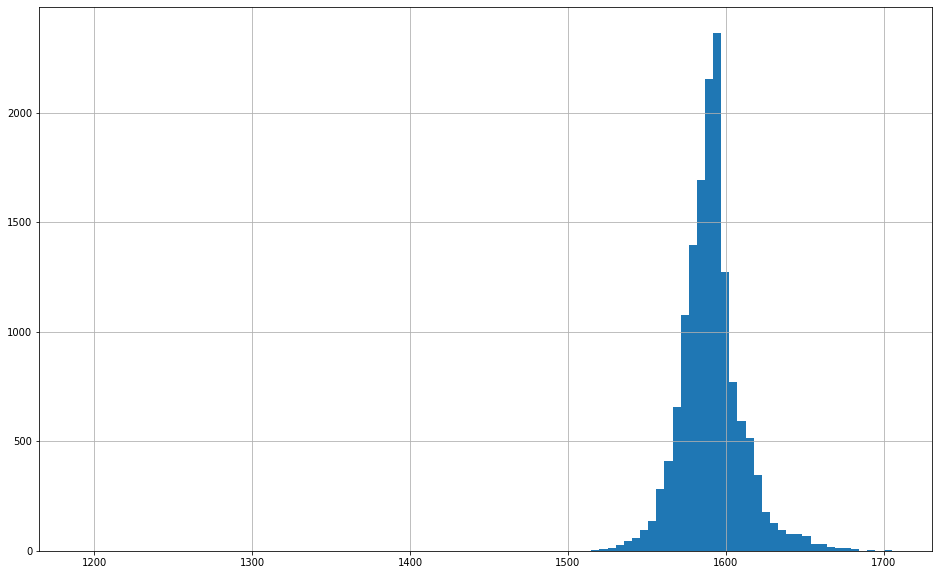

In [26]:
display(data_temp_new['Температура'].describe())
data_temp_new['Температура'].hist(bins=100, figsize=(16,10))

2.6 данные о проволочных материалах (объём)

In [27]:
show_info(data_wire_new)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3081 non-null   int64  
 1   Wire 1  3055 non-null   float64
 2   Wire 2  1079 non-null   float64
 3   Wire 3  63 non-null     float64
 4   Wire 4  14 non-null     float64
 5   Wire 5  1 non-null      float64
 6   Wire 6  73 non-null     float64
 7   Wire 7  11 non-null     float64
 8   Wire 8  19 non-null     float64
 9   Wire 9  29 non-null     float64
dtypes: float64(9), int64(1)
memory usage: 240.8 KB
None


,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,60.059998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,96.052315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,91.160157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,89.063515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,89.238236,9.11456,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
3076,3237,38.088959,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3077,3238,56.128799,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3078,3239,143.357761,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3079,3240,34.070400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Уникальные значения столбца key
[   1    2    3 ... 3239 3240 3241]
Уникальные значения столбца Wire 1
[  1.9188     2.09664    3.10128  ... 280.987214 330.314424        nan]
Уникальные значения столбца Wire 2
[3.01600000e-02 6.03200000e-02 9.04800000e-02 9.04800000e-02
 1.74720000e-01 5.82400000e-01 1.17624000e+00 1.60160000e+00
 2.74456000e+00 3.98112000e+00 4.10176000e+00 4.13192000e+00
 5.12720000e+00 7.72096000e+00 8.08288000e+00 8.11304000e+00
 8.17336000e+00 8.83688000e+00 9.01784000e+00 9.04800000e+00
 9.07816000e+00 9.08544100e+00 9.10832000e+00 9.11456000e+00
 9.13848000e+00 9.14368100e+00 9.16864000e+00 9.19880000e+00
 9.22896000e+00 9.31944000e+00 9.68136000e+00 1.00432800e+01
 1.00734400e+01 1.01036000e+01 1.01337590e+01 1.01337600e+01
 1.01639190e+01 1.01940790e+01 1.02242400e+01 1.10385600e+01
 1.10687200e+01 1.10988800e+01 1.11238400e+01 1.11290400e+01
 1.11592000e+01 1.11893600e+01 1.12195200e+01 1.20338400e+01
 1.20848000e+01 1.20941600e+01 1.21243200e+01 1.21430400e+

In [28]:
len(data_wire_new['key'].unique())

3081

In [29]:
data_wire_new['key'].value_counts()

2049    1
2664    1
2590    1
543     1
2592    1
       ..
1090    1
3139    1
1092    1
3141    1
2047    1
Name: key, Length: 3081, dtype: int64

Wire 1


count    3055.000000
mean      100.895853
std        42.012518
min         1.918800
25%        72.115684
50%       100.158234
75%       126.060483
max       330.314424
Name: Wire 1, dtype: float64

Wire 2


count    1079.000000
mean       50.577323
std        39.320216
min         0.030160
25%        20.193680
50%        40.142956
75%        70.227558
max       282.780152
Name: Wire 2, dtype: float64

Wire 3


count     63.000000
mean     189.482681
std       99.513444
min        0.144144
25%       95.135044
50%      235.194977
75%      276.252014
max      385.008668
Name: Wire 3, dtype: float64

Wire 4


count     14.000000
mean      57.442841
std       28.824667
min       24.148801
25%       40.807002
50%       45.234282
75%       76.124619
max      113.231044
Name: Wire 4, dtype: float64

Wire 5


count     1.000
mean     15.132
std         NaN
min      15.132
25%      15.132
50%      15.132
75%      15.132
max      15.132
Name: Wire 5, dtype: float64

Wire 6


count     73.000000
mean      48.016974
std       33.919845
min        0.034320
25%       25.053600
50%       42.076324
75%       64.212723
max      180.454575
Name: Wire 6, dtype: float64

Wire 7


count    11.000000
mean     10.039007
std       8.610584
min       0.234208
25%       6.762756
50%       9.017009
75%      11.886057
max      32.847674
Name: Wire 7, dtype: float64

Wire 8


count     19.000000
mean      53.625193
std       16.881728
min       45.076721
25%       46.094879
50%       46.279999
75%       48.089603
max      102.762401
Name: Wire 8, dtype: float64

Wire 9


count    29.000000
mean     34.155752
std      19.931616
min       4.622800
25%      22.058401
50%      30.066399
75%      43.862003
max      90.053604
Name: Wire 9, dtype: float64

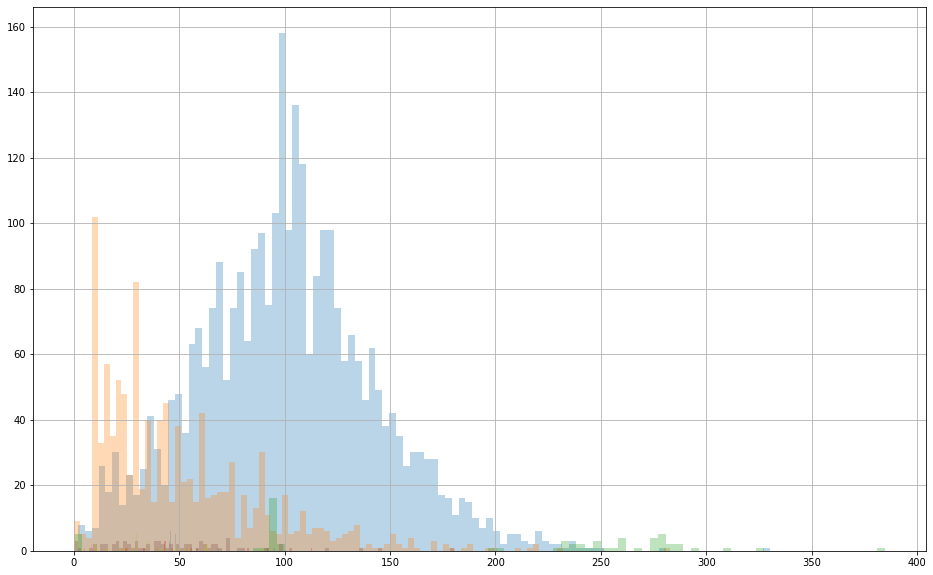

In [30]:
for column in data_wire_new.columns:
    if column[0] == 'W':
        print(column)
        display(data_wire_new[column].describe())
        data_wire_new[column].hist(bins=100, figsize=(16,10), alpha=0.3)

2.7 данные о проволочных материалах (время)

In [31]:
show_info(data_wire_time_new)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   key     3081 non-null   int64 
 1   Wire 1  3055 non-null   object
 2   Wire 2  1079 non-null   object
 3   Wire 3  63 non-null     object
 4   Wire 4  14 non-null     object
 5   Wire 5  1 non-null      object
 6   Wire 6  73 non-null     object
 7   Wire 7  11 non-null     object
 8   Wire 8  19 non-null     object
 9   Wire 9  29 non-null     object
dtypes: int64(1), object(9)
memory usage: 240.8+ KB
None


,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,2019-05-03 11:06:19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2019-05-03 11:36:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2019-05-03 12:11:46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2019-05-03 12:43:22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2019-05-03 13:20:44,2019-05-03 13:15:34,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
3076,3237,2019-09-06 11:33:38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3077,3238,2019-09-06 12:18:35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3078,3239,2019-09-06 14:36:11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3079,3240,2019-09-06 15:33:55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Уникальные значения столбца key
[   1    2    3 ... 3239 3240 3241]
Уникальные значения столбца Wire 1
['2019-05-03 11:06:19' '2019-05-03 11:36:50' '2019-05-03 12:11:46' ...
 '2019-09-06 15:33:55' '2019-09-06 17:10:06' nan]
Уникальные значения столбца Wire 2
['2019-05-03 13:15:34' '2019-05-03 13:48:52' '2019-05-03 15:39:37' ...
 '2019-09-06 01:38:22' '2019-09-06 07:35:40' nan]
Уникальные значения столбца Wire 3
['2019-05-04 04:34:27' '2019-05-04 05:41:29' '2019-05-07 15:39:35'
 '2019-05-07 17:12:49' '2019-05-07 22:24:56' '2019-05-07 23:37:44'
 '2019-05-08 02:25:41' '2019-05-08 06:25:36' '2019-05-08 07:00:18'
 '2019-05-08 07:47:18' '2019-05-19 02:20:39' '2019-05-19 02:57:29'
 '2019-05-19 10:05:03' '2019-05-19 11:07:37' '2019-06-04 12:35:52'
 '2019-06-10 15:07:04' '2019-06-12 13:28:13' '2019-06-12 14:01:36'
 '2019-06-12 14:38:14' '2019-06-14 02:18:05' '2019-06-14 21:33:28'
 '2019-06-14 22:16:16' '2019-07-10 18:21:05' '2019-07-10 19:02:13'
 '2019-07-10 20:08:55' '2019-07-11 18:01:03' '201

In [32]:
len(data_wire_time_new['key'].unique())

3081

In [33]:
data_wire_time_new['key'].value_counts()

2049    1
2664    1
2590    1
543     1
2592    1
       ..
1090    1
3139    1
1092    1
3141    1
2047    1
Name: key, Length: 3081, dtype: int64

# Вывод:

1. Разноязычные названия столбцов. Имена столбцов нужно превести к английскому языку прописными буквами и избавиться от пробелов.

2. Во всех датасетах неправильный тип данных у времени. Необходим перевод времени в формат datetime.

3. Есть пропуски - Nan, заменим на 0.

4. В таблицах разное количество уникальных номеров партии key, удаляем с одним замером.

5. Аномальное значение реактивной мощности в таблице data_arc_new. Отрицательное значение удалим.

6. Необходимо агрегировать данные для каждой партии.

7. Удаляем данные с температурой < 1500.

# План работы:

1.Подготовить данные (типы данных, анамалии, пропуски).

2.Подготовка признаков (составление единой таблицы со всеми данными, выделение целевого признака).

3.Выбор моделей.

4.Оценка лучшей модели на тестовой выборке.

## Подготовить данные (типы данных, анамалии, пропуски).

Разноязычные названия столбцов. Имена столбцов нужно превести к английскому языку прописными буквами и избавиться от пробелов.

In [34]:
data_arc_new.columns = ['key','start_time', 'end_time', 'active_capacity', 'reactive_capacity']
data_bulk_new.columns = ['key'] + ['bulk_'+ str(i) for i in  range(1,16)]
data_bulk_time_new.columns = ['key'] + ['bulk_time_'+ str(i) for i in  range(1,16)]
data_wire_new.columns = ['key'] + ['wire_'+ str(i) for i in  range(1,10)]
data_wire_time_new.columns = ['key'] + ['wire_time_'+ str(i) for i in  range(1,10)]
data_gas_new.columns = ['key', 'gas']
data_temp_new.columns = ['key', 'sample_time', 'temp']

In [35]:
data_arc_new.head()

,key,start_time,end_time,active_capacity,reactive_capacity
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.305130,0.211253
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.765658,0.477438
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.580313,0.430460
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,0.518496,0.379979
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.867133,0.643691


In [36]:
data_bulk_new.head()

,key,bulk_1,bulk_2,bulk_3,bulk_4,bulk_5,bulk_6,bulk_7,bulk_8,bulk_9,bulk_10,bulk_11,bulk_12,bulk_13,bulk_14,bulk_15
0,1,NaN,NaN,NaN,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,150.0,154.0
1,2,NaN,NaN,NaN,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,149.0,154.0
2,3,NaN,NaN,NaN,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,205.0,NaN,152.0,153.0
3,4,NaN,NaN,NaN,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,207.0,NaN,153.0,154.0
4,5,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203.0,NaN,151.0,152.0


In [37]:
data_bulk_time_new.head()

,key,bulk_time_1,bulk_time_2,bulk_time_3,bulk_time_4,bulk_time_5,bulk_time_6,bulk_time_7,bulk_time_8,bulk_time_9,bulk_time_10,bulk_time_11,bulk_time_12,bulk_time_13,bulk_time_14,bulk_time_15
0,1,NaN,NaN,NaN,2019-05-03 11:28:48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:24:31,NaN,2019-05-03 11:14:50,2019-05-03 11:10:43
1,2,NaN,NaN,NaN,2019-05-03 11:36:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:53:30,NaN,2019-05-03 11:48:37,2019-05-03 11:44:39
2,3,NaN,NaN,NaN,2019-05-03 12:32:39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:27:13,NaN,2019-05-03 12:21:01,2019-05-03 12:16:16
3,4,NaN,NaN,NaN,2019-05-03 12:43:22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:58:00,NaN,2019-05-03 12:51:11,2019-05-03 12:46:36
4,5,NaN,NaN,NaN,2019-05-03 13:30:47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 13:30:47,NaN,2019-05-03 13:34:12,2019-05-03 13:30:47


In [38]:
data_wire_new.head()

,key,wire_1,wire_2,wire_3,wire_4,wire_5,wire_6,wire_7,wire_8,wire_9
0,1,60.059998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,96.052315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,91.160157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,89.063515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,89.238236,9.11456,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
data_wire_time_new.head()

,key,wire_time_1,wire_time_2,wire_time_3,wire_time_4,wire_time_5,wire_time_6,wire_time_7,wire_time_8,wire_time_9
0,1,2019-05-03 11:06:19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2019-05-03 11:36:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2019-05-03 12:11:46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2019-05-03 12:43:22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2019-05-03 13:20:44,2019-05-03 13:15:34,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
data_gas_new.head()

,key,gas
0,1,29.749986
1,2,12.555561
2,3,28.554793
3,4,18.841219
4,5,5.413692


In [41]:
data_temp_new.head()

,key,sample_time,temp
0,1,2019-05-03 11:02:04,1571.0
1,1,2019-05-03 11:07:18,1604.0
2,1,2019-05-03 11:11:34,1618.0
3,1,2019-05-03 11:18:04,1601.0
4,1,2019-05-03 11:25:59,1606.0


Во всех датасетах неправильный тип данных у времени. Необходим перевод времени в формат datetime.

In [42]:
data_arc_new['start_time'] = pd.to_datetime(data_arc_new['start_time'])
data_arc_new['end_time'] = pd.to_datetime(data_arc_new['end_time'])
data_temp_new['sample_time'] = pd.to_datetime(data_temp_new['sample_time'])

data_bulk_time_new[['bulk_time_'+ str(i) for i in  range(1,16)]] = data_bulk_time_new[
               ['bulk_time_'+ str(i) for i in  range(1,16)]].apply(pd.to_datetime)

data_wire_time_new[['wire_time_'+ str(i) for i in  range(1,10)]] = data_wire_time_new[
               ['wire_time_'+ str(i) for i in  range(1,10)]].apply(pd.to_datetime)  

In [43]:
data_arc_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14876 entries, 0 to 14875
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   key                14876 non-null  int64         
 1   start_time         14876 non-null  datetime64[ns]
 2   end_time           14876 non-null  datetime64[ns]
 3   active_capacity    14876 non-null  float64       
 4   reactive_capacity  14876 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(1)
memory usage: 581.2 KB


In [44]:
data_temp_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18092 entries, 0 to 18091
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   key          18092 non-null  int64         
 1   sample_time  18092 non-null  datetime64[ns]
 2   temp         14665 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 424.2 KB


In [45]:
data_bulk_time_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   key           3129 non-null   int64         
 1   bulk_time_1   252 non-null    datetime64[ns]
 2   bulk_time_2   22 non-null     datetime64[ns]
 3   bulk_time_3   1298 non-null   datetime64[ns]
 4   bulk_time_4   1014 non-null   datetime64[ns]
 5   bulk_time_5   77 non-null     datetime64[ns]
 6   bulk_time_6   576 non-null    datetime64[ns]
 7   bulk_time_7   25 non-null     datetime64[ns]
 8   bulk_time_8   1 non-null      datetime64[ns]
 9   bulk_time_9   19 non-null     datetime64[ns]
 10  bulk_time_10  176 non-null    datetime64[ns]
 11  bulk_time_11  177 non-null    datetime64[ns]
 12  bulk_time_12  2450 non-null   datetime64[ns]
 13  bulk_time_13  18 non-null     datetime64[ns]
 14  bulk_time_14  2806 non-null   datetime64[ns]
 15  bulk_time_15  2248 non-null   datetime

In [46]:
data_wire_time_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   key          3081 non-null   int64         
 1   wire_time_1  3055 non-null   datetime64[ns]
 2   wire_time_2  1079 non-null   datetime64[ns]
 3   wire_time_3  63 non-null     datetime64[ns]
 4   wire_time_4  14 non-null     datetime64[ns]
 5   wire_time_5  1 non-null      datetime64[ns]
 6   wire_time_6  73 non-null     datetime64[ns]
 7   wire_time_7  11 non-null     datetime64[ns]
 8   wire_time_8  19 non-null     datetime64[ns]
 9   wire_time_9  29 non-null     datetime64[ns]
dtypes: datetime64[ns](9), int64(1)
memory usage: 240.8 KB


In [47]:
data_temp_new.tail(15)

,key,sample_time,temp
18077,3239,2019-09-06 14:59:25,NaN
18078,3239,2019-09-06 15:03:35,NaN
18079,3239,2019-09-06 15:09:55,NaN
18080,3240,2019-09-06 15:25:21,1617.0
18081,3240,2019-09-06 15:30:52,NaN
18082,3240,2019-09-06 15:58:35,NaN
18083,3240,2019-09-06 16:02:31,NaN
18084,3240,2019-09-06 16:21:44,NaN
18085,3240,2019-09-06 16:35:26,NaN
18086,3241,2019-09-06 16:48:55,1586.0


In [48]:
data_temp_new[data_temp_new['temp'].isnull()].head()

,key,sample_time,temp
13927,2500,2019-08-10 14:13:11,NaN
13928,2500,2019-08-10 14:18:12,NaN
13929,2500,2019-08-10 14:25:53,NaN
13930,2500,2019-08-10 14:29:39,NaN
13932,2501,2019-08-10 14:49:15,NaN


In [49]:
data_temp_new[data_temp_new['temp'].isnull()].tail()

,key,sample_time,temp
18087,3241,2019-09-06 16:55:01,NaN
18088,3241,2019-09-06 17:06:38,NaN
18089,3241,2019-09-06 17:21:48,NaN
18090,3241,2019-09-06 17:24:44,NaN
18091,3241,2019-09-06 17:30:05,NaN


Начиная с партии 2500, пропущенны все значения температуры, кроме первого измерения

Удалим из таблицы партии key, которые не подходят по следующим условиям:

 - нет финального замера, 
 
 - только один замер температуры.

In [50]:
bad_keys = []
for key in list(data_temp_new['key'].unique()):
    try:
        if ((data_temp_new[data_temp_new['key'] == key]['sample_time'].max() < 
            data_arc_new[data_arc_new['key'] == key]['end_time'].max()) or
           (data_temp_new[data_temp_new['key'] == key]['sample_time'].max() == 
            data_temp_new[data_temp_new['key'] == key]['sample_time'].min())):
            bad_keys.append(key)
    except:
        bad_keys.append(key)
print(bad_keys, len(bad_keys))

[195, 279] 2


In [51]:
data_gas_new = data_gas_new.query('key not in (195, 279)')
data_gas_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3237 entries, 0 to 3238
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3237 non-null   int64  
 1   gas     3237 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 75.9 KB


In [52]:
data_temp_new = data_temp_new.query('key not in @bad_keys')
data_temp_new = data_temp_new.dropna()
data_temp_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14663 entries, 0 to 18086
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   key          14663 non-null  int64         
 1   sample_time  14663 non-null  datetime64[ns]
 2   temp         14663 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 458.2 KB


In [53]:
count = data_arc_new['key'].value_counts().sort_index().reset_index().rename(columns={"index": "key", "key": "count"})
count.head()

,key,count
0,1,5
1,2,4
2,3,5
3,4,4
4,5,4


Нужно агрегировать данные data_arc_new для каждой партии по key (сумма мощностей). Аномальное значение реактивной мощности в таблице data_arc_new. Отрицательное значение удалим.

In [54]:
data_arc_new = data_arc_new.query('reactive_capacity > 0')
data_arc_new

,key,start_time,end_time,active_capacity,reactive_capacity
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.305130,0.211253
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.765658,0.477438
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.580313,0.430460
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,0.518496,0.379979
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.867133,0.643691
...,...,...,...,...,...
14871,3241,2019-09-06 16:49:05,2019-09-06 16:51:42,0.439735,0.299579
14872,3241,2019-09-06 16:55:11,2019-09-06 16:58:11,0.646498,0.458240
14873,3241,2019-09-06 17:06:48,2019-09-06 17:09:52,1.039726,0.769302
14874,3241,2019-09-06 17:21:58,2019-09-06 17:22:55,0.530267,0.361543


Создадим таблицу data_arc_sum по key:

In [55]:
data_arc_sum = pd.pivot_table(data_arc_new,
                             values=['active_capacity','reactive_capacity'],
                             index='key',
                             aggfunc={'active_capacity': np.sum,
                                      'reactive_capacity': np.sum})
data_arc_sum.columns = ['sum_active_capacity','sum_reactive_capacity']
data_arc_sum.head()

,sum_active_capacity,sum_reactive_capacity
key,,
1,3.036730,2.142821
2,2.139408,1.453357
3,4.063641,2.937457
4,2.706489,2.056992
5,2.252950,1.687991


In [56]:
data_arc_sum

,sum_active_capacity,sum_reactive_capacity
key,,
1,3.036730,2.142821
2,2.139408,1.453357
3,4.063641,2.937457
4,2.706489,2.056992
5,2.252950,1.687991
...,...,...
3237,2.541872,2.025417
3238,1.374821,1.038103
3239,4.848005,3.541541


В таблицах разное количество уникальных номеров партии key, удаляем с одним замером.

In [57]:
bad_keys2 = (data_temp_new['key'].value_counts() <2).sum() 
good_keys2 = list(data_temp_new['key'].value_counts().index[:-bad_keys2])
data_temp_new = data_temp_new.query('key in @good_keys2')
data_temp_new['key'].value_counts()

2108    17
1513    16
1689    16
322     14
46      14
        ..
556      2
661      2
1568     2
2112     2
614      2
Name: key, Length: 2475, dtype: int64

In [58]:
data_temp_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13924 entries, 0 to 13925
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   key          13924 non-null  int64         
 1   sample_time  13924 non-null  datetime64[ns]
 2   temp         13924 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 435.1 KB


Рассмотрим таблицы подачи материалов при плавке:

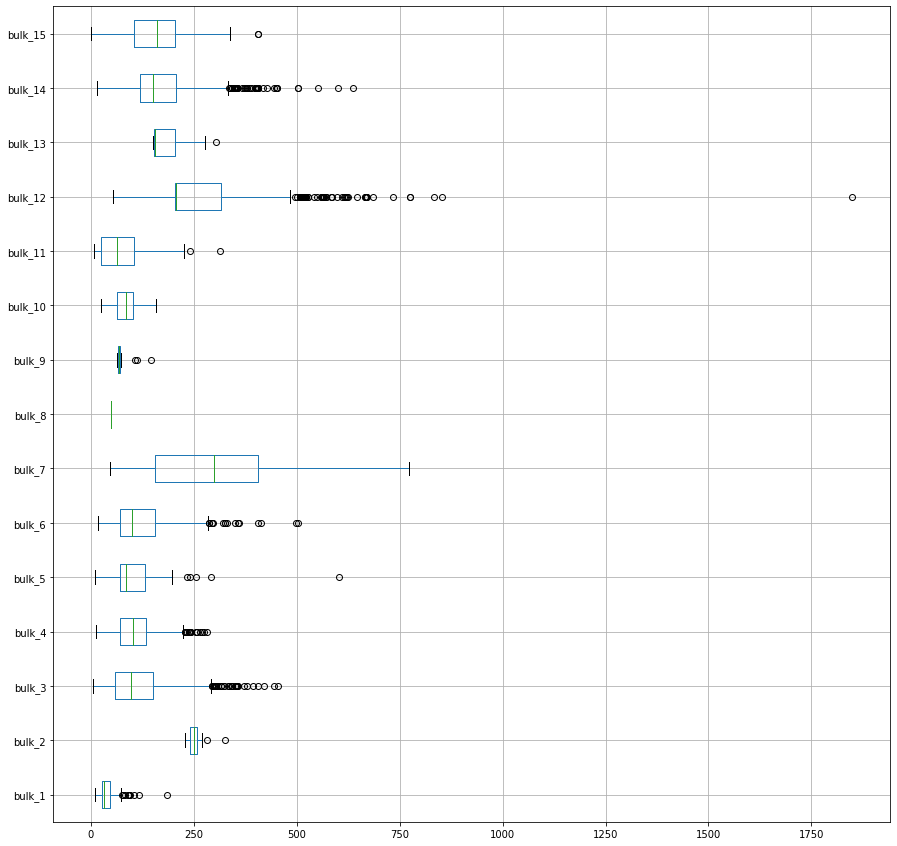

In [59]:
plt.figure(figsize=(15, 15))
data_bulk_new.boxplot([col for col in data_bulk_new.columns if col != 'key'], vert=False)
plt.show()

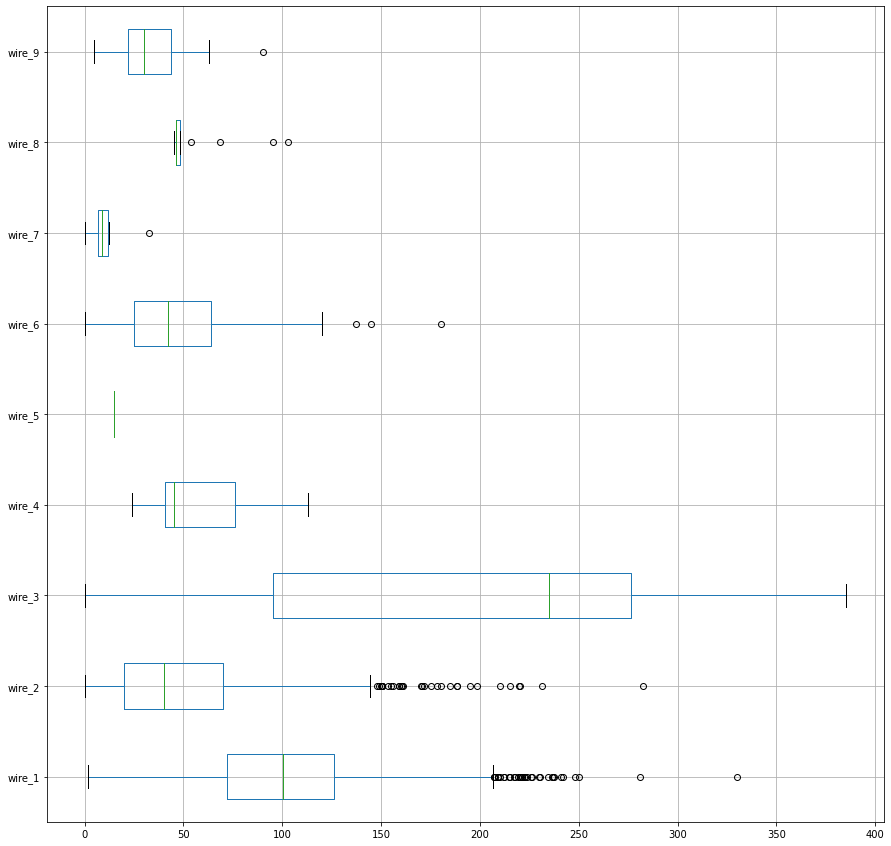

In [60]:
plt.figure(figsize=(15, 15))
data_wire_new.boxplot([col for col in data_wire_new.columns if col != 'key'], vert=False)
plt.show()

Как видно из ящиков с усами:

В таблице data_bulk_new:

Почти все столбцы с небольшимы выбросами (данные за усами),
Bulk_8 добавляли лишь единожды. Возможно такими данными можно пренебречь,
Bulk_12 есть аномально большое значение. Думаю такую строку можно исключить, чтобы не исказить модель.

В таблице data_wire_new:

Почти все столбцы с небольшимы выбросами (данные за усами),
Wire 5 добавляли лишь единожды. Возможно такими данными можно пренебречь.

Общий вывод:

1.Есть некоторые материалы, которые добавляли очень редко.

2.Нужно выбрать максимальное количество материала, которое добавляют и исключить данные по столбцам, которые будут считаться выбросами.

3.Пропуска можно заполнить значением 0.

Температура плавления выше 1500 градусов, удаляем данные с температурой < 1500.

In [61]:
data_temp_new = data_temp_new.query('temp > 1500')
data_temp_new

,key,sample_time,temp
0,1,2019-05-03 11:02:04,1571.0
1,1,2019-05-03 11:07:18,1604.0
2,1,2019-05-03 11:11:34,1618.0
3,1,2019-05-03 11:18:04,1601.0
4,1,2019-05-03 11:25:59,1606.0
...,...,...,...
13921,2499,2019-08-10 13:33:21,1569.0
13922,2499,2019-08-10 13:41:34,1604.0
13923,2499,2019-08-10 13:46:28,1593.0
13924,2499,2019-08-10 13:54:56,1588.0


Вычленим из всех плавок данные по последним измерениям

In [62]:
data_temp_end = data_temp_new.groupby('key')['sample_time'].max().reset_index()
data_temp_end = data_temp_end.merge(data_temp_new, how = 'left', on = ['key', 'sample_time'])
data_temp_end.columns = ['key' , 'sample_time_end' , 'temp_end']
data_temp_end

,key,sample_time_end,temp_end
0,1,2019-05-03 11:30:38,1613.0
1,2,2019-05-03 11:55:09,1602.0
2,3,2019-05-03 12:35:57,1599.0
3,4,2019-05-03 12:59:47,1625.0
4,5,2019-05-03 13:36:39,1602.0
...,...,...,...
2470,2495,2019-08-10 11:50:47,1591.0
2471,2496,2019-08-10 12:25:13,1591.0
2472,2497,2019-08-10 12:53:28,1589.0
2473,2498,2019-08-10 13:23:31,1594.0


In [63]:
data_temp_end = data_temp_end.dropna()
data_temp_end

,key,sample_time_end,temp_end
0,1,2019-05-03 11:30:38,1613.0
1,2,2019-05-03 11:55:09,1602.0
2,3,2019-05-03 12:35:57,1599.0
3,4,2019-05-03 12:59:47,1625.0
4,5,2019-05-03 13:36:39,1602.0
...,...,...,...
2470,2495,2019-08-10 11:50:47,1591.0
2471,2496,2019-08-10 12:25:13,1591.0
2472,2497,2019-08-10 12:53:28,1589.0
2473,2498,2019-08-10 13:23:31,1594.0


In [64]:
data_temp_end.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2475 entries, 0 to 2474
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   key              2475 non-null   int64         
 1   sample_time_end  2475 non-null   datetime64[ns]
 2   temp_end         2475 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 77.3 KB


По аналогии с ним создадим датасет data_temp_start

In [65]:
data_temp_start = data_temp_new.groupby('key')['sample_time'].min().reset_index()
data_temp_start = data_temp_start.merge(data_temp_new, how = 'left', on = ['key', 'sample_time'])
data_temp_start.columns = ['key', 'sample_time_start', 'temp_start']
data_temp_start

,key,sample_time_start,temp_start
0,1,2019-05-03 11:02:04,1571.0
1,2,2019-05-03 11:34:04,1581.0
2,3,2019-05-03 12:06:44,1596.0
3,4,2019-05-03 12:39:27,1601.0
4,5,2019-05-03 13:11:03,1576.0
...,...,...,...
2470,2495,2019-08-10 11:27:47,1570.0
2471,2496,2019-08-10 11:56:48,1554.0
2472,2497,2019-08-10 12:37:26,1571.0
2473,2498,2019-08-10 12:58:11,1591.0


Теперь объединяем датасеты с начальной и конечной температурой

In [66]:
data_temp_start_end = data_temp_start.merge(data_temp_end, on = ['key'])
data_temp_start_end

,key,sample_time_start,temp_start,sample_time_end,temp_end
0,1,2019-05-03 11:02:04,1571.0,2019-05-03 11:30:38,1613.0
1,2,2019-05-03 11:34:04,1581.0,2019-05-03 11:55:09,1602.0
2,3,2019-05-03 12:06:44,1596.0,2019-05-03 12:35:57,1599.0
3,4,2019-05-03 12:39:27,1601.0,2019-05-03 12:59:47,1625.0
4,5,2019-05-03 13:11:03,1576.0,2019-05-03 13:36:39,1602.0
...,...,...,...,...,...
2470,2495,2019-08-10 11:27:47,1570.0,2019-08-10 11:50:47,1591.0
2471,2496,2019-08-10 11:56:48,1554.0,2019-08-10 12:25:13,1591.0
2472,2497,2019-08-10 12:37:26,1571.0,2019-08-10 12:53:28,1589.0
2473,2498,2019-08-10 12:58:11,1591.0,2019-08-10 13:23:31,1594.0


Добавляем в таблицу количество интераций

In [67]:
data_temp_start_end = data_temp_start_end.merge(count, on='key')
data_temp_start_end

,key,sample_time_start,temp_start,sample_time_end,temp_end,count
0,1,2019-05-03 11:02:04,1571.0,2019-05-03 11:30:38,1613.0,5
1,2,2019-05-03 11:34:04,1581.0,2019-05-03 11:55:09,1602.0,4
2,3,2019-05-03 12:06:44,1596.0,2019-05-03 12:35:57,1599.0,5
3,4,2019-05-03 12:39:27,1601.0,2019-05-03 12:59:47,1625.0,4
4,5,2019-05-03 13:11:03,1576.0,2019-05-03 13:36:39,1602.0,4
...,...,...,...,...,...,...
2470,2495,2019-08-10 11:27:47,1570.0,2019-08-10 11:50:47,1591.0,4
2471,2496,2019-08-10 11:56:48,1554.0,2019-08-10 12:25:13,1591.0,6
2472,2497,2019-08-10 12:37:26,1571.0,2019-08-10 12:53:28,1589.0,3
2473,2498,2019-08-10 12:58:11,1591.0,2019-08-10 13:23:31,1594.0,5


Строим гистограммы начальных и конечных температур плавок

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


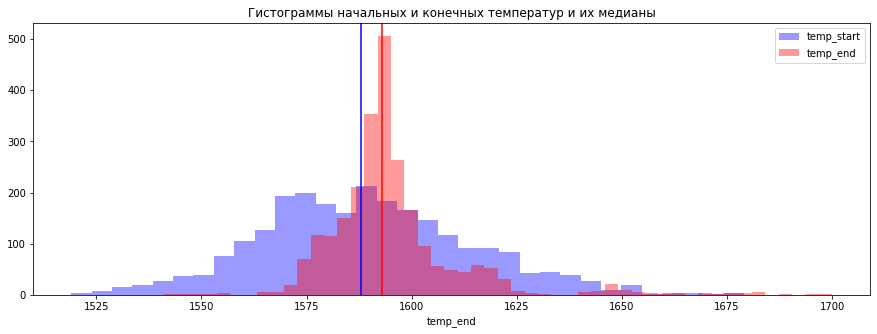

In [68]:
plt.figure(figsize=(15,5))
sns.distplot(data_temp_start_end['temp_start'], kde = False, label= 'temp_start', color='b')
sns.distplot(data_temp_start_end['temp_end'], kde = False,  label= 'temp_end', color='red')
plt.axvline(x = data_temp_start_end['temp_start'].median(), color='b')
plt.axvline(x = data_temp_start_end['temp_end'].median(), color='r')
plt.title('Гистограммы начальных и конечных температур и их медианы')
plt.legend()

# Вывод:

1.Имена столбцов превели к английскому языку прописными буквами и убрали пробелы.

2.Перевели данные время в формат datetime.

3.Определили, что после 2500 партии происходит один замер.

4.Добавли дополнительный параметр - количество интераций в партии и сумму мощностей. 

5.Есть некоторые материалы для плавления, которые добавляли очень редко, нужно рассмотреть, как повлияет исключение таких столбцов на модель.

6.В таблицах добавления материалов пропуска можно заполнить значением 0, но сделае это только перед обучение, чтобы посмотреть на реальное распределение материалов.

7.В температуре есть значения сильно ниже плавления стали, убрали значения ниже 1500.

## Подготовка признаков (составление единой таблицы со всеми данными, выделение целевого признака).

Прежде, чем объединять таблицы, добавим дополнительные параметры (полная мощность, время нагрева, разнецу времени и энергию).

In [69]:
data_arc_new['full_capacity'] = (data_arc_new['active_capacity'] ** 2 + data_arc_new['reactive_capacity'] ** 2) ** (0.5)

data_arc_new['heating_time'] = (data_arc_new['end_time'] - data_arc_new['start_time'])

data_arc_new['time_1'] = (data_temp_start_end['sample_time_end'] - data_arc_new['start_time'])// pd.Timedelta('1s')


data_arc_new['heating_time'] = data_arc_new['heating_time'].apply(pd.Timedelta.total_seconds).astype('int')

data_arc_new['power'] = data_arc_new['heating_time'] * data_arc_new['full_capacity']


data_arc_new

,key,start_time,end_time,active_capacity,reactive_capacity,full_capacity,heating_time,time_1,power
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.305130,0.211253,0.371123,228,1704.0,84.616003
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.765658,0.477438,0.902319,185,2861.0,166.928978
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.580313,0.430460,0.722536,172,5053.0,124.276277
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,0.518496,0.379979,0.642824,365,6093.0,234.630603
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.867133,0.643691,1.079934,148,7830.0,159.830252
...,...,...,...,...,...,...,...,...,...
14871,3241,2019-09-06 16:49:05,2019-09-06 16:51:42,0.439735,0.299579,0.532085,157,NaN,83.537345
14872,3241,2019-09-06 16:55:11,2019-09-06 16:58:11,0.646498,0.458240,0.792429,180,NaN,142.637202
14873,3241,2019-09-06 17:06:48,2019-09-06 17:09:52,1.039726,0.769302,1.293389,184,NaN,237.983620
14874,3241,2019-09-06 17:21:58,2019-09-06 17:22:55,0.530267,0.361543,0.641792,57,NaN,36.582120


Группируем данные по партиям, в которых будет общая сумма времени нагрева, мощности и энергии.

In [70]:
df_arc_keys = data_arc_new.groupby('key').sum()[['heating_time', 'full_capacity', 'power', 'time_1']].reset_index()
df_arc_keys

,key,heating_time,full_capacity,power,time_1
0,1,1098,3.718736,770.282114,23541.0
1,2,811,2.588349,481.760005,48932.0
2,3,655,5.019223,722.837668,111612.0
3,4,741,3.400038,683.455597,147298.0
4,5,869,2.816980,512.169934,202066.0
...,...,...,...,...,...
3209,3237,909,3.250657,630.503534,0.0
3210,3238,546,1.723937,286.052252,0.0
3211,3239,1216,6.014480,941.538764,0.0
3212,3240,839,4.082920,657.439848,0.0


Заполняем пропуски в data_bulk_new и data_wire_new - 0.

In [71]:
data_bulk_new = data_bulk_new.fillna(0)
data_wire_new = data_wire_new.fillna(0)

In [72]:
data_bulk_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   key      3129 non-null   int64  
 1   bulk_1   3129 non-null   float64
 2   bulk_2   3129 non-null   float64
 3   bulk_3   3129 non-null   float64
 4   bulk_4   3129 non-null   float64
 5   bulk_5   3129 non-null   float64
 6   bulk_6   3129 non-null   float64
 7   bulk_7   3129 non-null   float64
 8   bulk_8   3129 non-null   float64
 9   bulk_9   3129 non-null   float64
 10  bulk_10  3129 non-null   float64
 11  bulk_11  3129 non-null   float64
 12  bulk_12  3129 non-null   float64
 13  bulk_13  3129 non-null   float64
 14  bulk_14  3129 non-null   float64
 15  bulk_15  3129 non-null   float64
dtypes: float64(15), int64(1)
memory usage: 391.2 KB


In [73]:
data_wire_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3081 non-null   int64  
 1   wire_1  3081 non-null   float64
 2   wire_2  3081 non-null   float64
 3   wire_3  3081 non-null   float64
 4   wire_4  3081 non-null   float64
 5   wire_5  3081 non-null   float64
 6   wire_6  3081 non-null   float64
 7   wire_7  3081 non-null   float64
 8   wire_8  3081 non-null   float64
 9   wire_9  3081 non-null   float64
dtypes: float64(9), int64(1)
memory usage: 240.8 KB


Объединяем данные в один датафрейм:

In [74]:
df_final = (data_temp_start_end.merge(df_arc_keys, how ='inner', on ='key').merge(data_bulk_new, how ='inner', on ='key').merge(data_gas_new, how ='inner', on ='key').merge(data_wire_new, how ='inner', on ='key'))

In [75]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2329 entries, 0 to 2328
Data columns (total 35 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   key                2329 non-null   int64         
 1   sample_time_start  2329 non-null   datetime64[ns]
 2   temp_start         2329 non-null   float64       
 3   sample_time_end    2329 non-null   datetime64[ns]
 4   temp_end           2329 non-null   float64       
 5   count              2329 non-null   int64         
 6   heating_time       2329 non-null   int64         
 7   full_capacity      2329 non-null   float64       
 8   power              2329 non-null   float64       
 9   time_1             2329 non-null   float64       
 10  bulk_1             2329 non-null   float64       
 11  bulk_2             2329 non-null   float64       
 12  bulk_3             2329 non-null   float64       
 13  bulk_4             2329 non-null   float64       
 14  bulk_5  

проверим, не появились ли пропуски при объединение таблиц

In [76]:
df_final.isna().mean()

key                  0.0
sample_time_start    0.0
temp_start           0.0
sample_time_end      0.0
temp_end             0.0
count                0.0
heating_time         0.0
full_capacity        0.0
power                0.0
time_1               0.0
bulk_1               0.0
bulk_2               0.0
bulk_3               0.0
bulk_4               0.0
bulk_5               0.0
bulk_6               0.0
bulk_7               0.0
bulk_8               0.0
bulk_9               0.0
bulk_10              0.0
bulk_11              0.0
bulk_12              0.0
bulk_13              0.0
bulk_14              0.0
bulk_15              0.0
gas                  0.0
wire_1               0.0
wire_2               0.0
wire_3               0.0
wire_4               0.0
wire_5               0.0
wire_6               0.0
wire_7               0.0
wire_8               0.0
wire_9               0.0
dtype: float64

Получили общий датафрейм.Удалим из созданного общего датасета временные признаки, они не будут участвовать в обучении модели и столбец с номером плавки key 

In [77]:
df_final = df_final.drop(columns = list(df_final.dtypes[df_final.dtypes == 'datetime64[ns]'].index) + ['key'])
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2329 entries, 0 to 2328
Data columns (total 32 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   temp_start     2329 non-null   float64
 1   temp_end       2329 non-null   float64
 2   count          2329 non-null   int64  
 3   heating_time   2329 non-null   int64  
 4   full_capacity  2329 non-null   float64
 5   power          2329 non-null   float64
 6   time_1         2329 non-null   float64
 7   bulk_1         2329 non-null   float64
 8   bulk_2         2329 non-null   float64
 9   bulk_3         2329 non-null   float64
 10  bulk_4         2329 non-null   float64
 11  bulk_5         2329 non-null   float64
 12  bulk_6         2329 non-null   float64
 13  bulk_7         2329 non-null   float64
 14  bulk_8         2329 non-null   float64
 15  bulk_9         2329 non-null   float64
 16  bulk_10        2329 non-null   float64
 17  bulk_11        2329 non-null   float64
 18  bulk_12 

Посмотрим на распределения сгруппированных и сгенерированных признаков

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


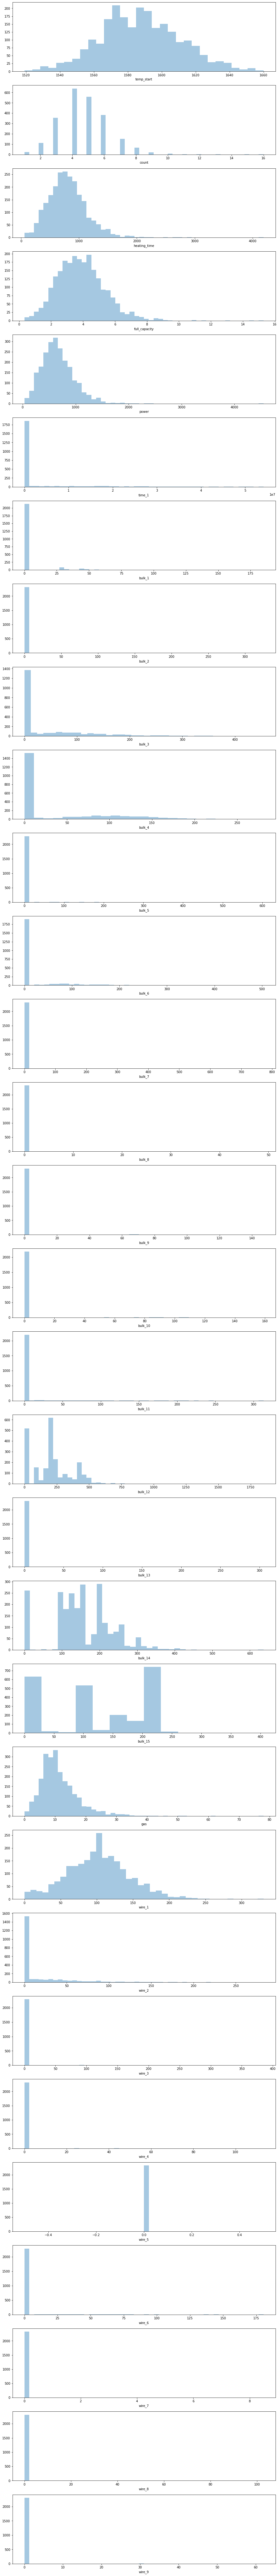

In [78]:
fig, ax = plt.subplots(df_final.drop(columns = 'temp_end').shape[1] , 1, figsize=(15,150))
i = 0
for col in df_final.drop(columns = 'temp_end').columns:
  sns.distplot(df_final[col].dropna(), kde = False, ax = ax[i])
  i +=1

Text(0.5, 1.0, 'Тепловая карта корреляций признаков с разбивкой по плавкам')

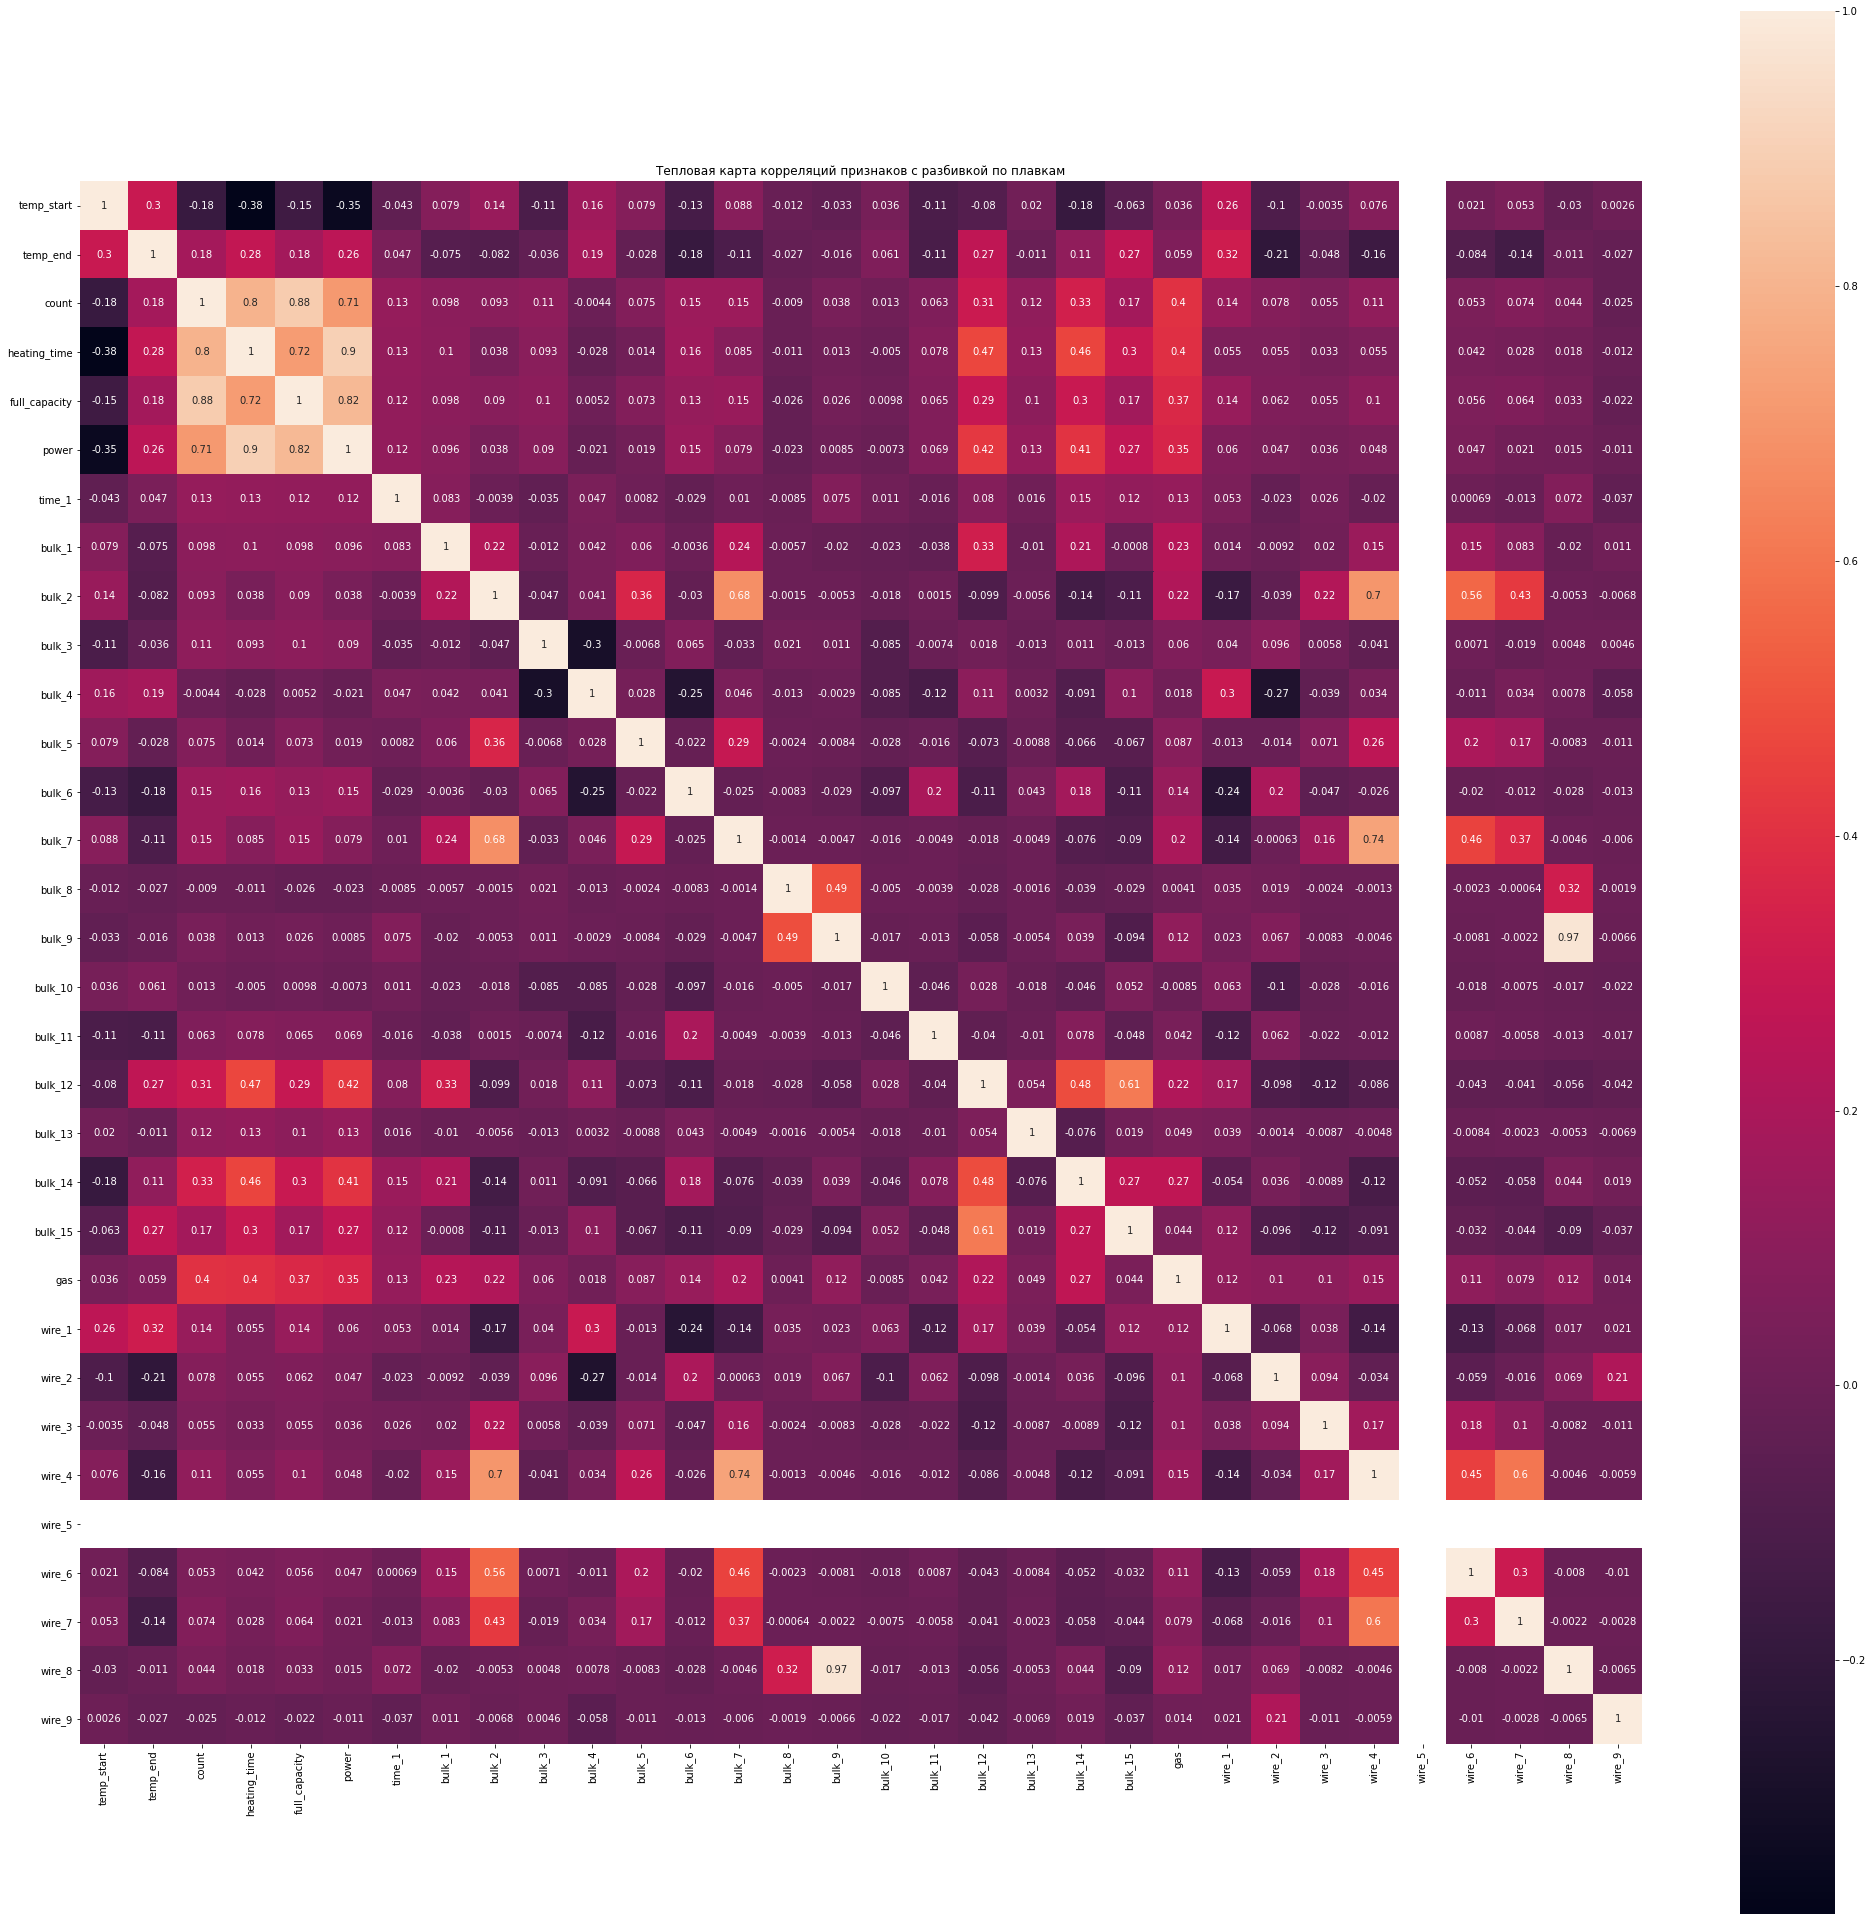

In [79]:
plt.figure(figsize=(35,35))
sns.heatmap(df_final.corr(), annot=True, fmt='.2g', square=True)
plt.title('Тепловая карта корреляций признаков с разбивкой по плавкам')

In [80]:
data_final = df_final.copy()

# Вывод:

1.Добавили дополнительные параметры (полная мощность, время нагрева, энергию).

2.Обеденили данные в общий датафрейм.

3.Посмотрили на распределения сгруппированных и сгенерированных признаков.

4.Удалили аномалии и получили финальный датафрейм.

## Выбор моделей.

Рассмотрим следующие модели:

Дерево решений

Случайный лес

LightGBM

XGBoost

CatBoost

In [81]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.dummy import DummyRegressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import lightgbm as lgb
import xgboost as xgb
from catboost import CatBoostRegressor
from sklearn.preprocessing import StandardScaler
from time import time

from sklearn.utils import shuffle

Предварительно перемешаем полученные данные:

In [82]:
df_shuffled = shuffle(data_final, random_state=50623)

df_shuffled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2329 entries, 1583 to 163
Data columns (total 32 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   temp_start     2329 non-null   float64
 1   temp_end       2329 non-null   float64
 2   count          2329 non-null   int64  
 3   heating_time   2329 non-null   int64  
 4   full_capacity  2329 non-null   float64
 5   power          2329 non-null   float64
 6   time_1         2329 non-null   float64
 7   bulk_1         2329 non-null   float64
 8   bulk_2         2329 non-null   float64
 9   bulk_3         2329 non-null   float64
 10  bulk_4         2329 non-null   float64
 11  bulk_5         2329 non-null   float64
 12  bulk_6         2329 non-null   float64
 13  bulk_7         2329 non-null   float64
 14  bulk_8         2329 non-null   float64
 15  bulk_9         2329 non-null   float64
 16  bulk_10        2329 non-null   float64
 17  bulk_11        2329 non-null   float64
 18  bulk_1

Создаю обучающую и тестовую выборки в соотношении 75:25

In [83]:
df_features = df_shuffled.drop(['temp_end'], axis=1)
df_target = df_shuffled['temp_end']

train_features, test_features, train_target, test_target = train_test_split(df_features, 
                                                                            df_target,
                                                                            test_size=0.25,
                                                                            random_state=50623)

Скалирую данные:

In [84]:
scaler = StandardScaler()
X_train_st = scaler.fit_transform(train_features)
X_test_st = scaler.transform(test_features)

Создаём таблицу для анализа

In [85]:
analisys = pd.DataFrame({'model':[], 'MAE_model':[], 'r2_score':[]})
all_models = []

Создаём функцию для подбора параметров

In [86]:
def train_model(model, parameters):
    
    model_random = GridSearchCV(estimator=model,
                                param_grid=parameters, 
                                scoring='neg_mean_absolute_error', 
                                cv=5, 
                                verbose=1)

    # посмотрим время обучения 
    start = time()
    model_random.fit(X_train_st, train_target)
    print('GridSearchCV подбирал параметры %.2f секунд' %(time() - start))
    
    # высчитаем метрики
    rmse = abs(model_random.best_score_)
    r2_sc_metr = r2_score(train_target, model_random.predict(X_train_st))
    
    print('Лучшие параметры:', model_random.best_params_)
    print('MAE обученной модели:', rmse)
    print('R2 модели:', r2_sc_metr)
    
    # заполним таблицу    
    all_models.append(model_random)
    row = []
    row.extend([model, rmse, r2_sc_metr])
    analisys.loc[len(analisys.index)] = row
    
    return model_random

Рассмотрим модели:

In [87]:
ran_grid_tree = {"max_depth": list(range(1, 15))}

dtr = DecisionTreeRegressor()

dtr_random = train_model(dtr, ran_grid_tree)

Fitting 5 folds for each of 14 candidates, totalling 70 fits
GridSearchCV подбирал параметры 1.01 секунд
Лучшие параметры: {'max_depth': 6}
MAE обученной модели: 7.284147691031069
R2 модели: 0.5297793060908462


In [88]:
ran_grid_forest = {
    'max_depth': list(range(3, 10)),
    'n_estimators': [200, 300]
}

rfr = RandomForestRegressor(n_jobs=-1)

rfr_random = train_model(rfr, ran_grid_forest)

Fitting 5 folds for each of 14 candidates, totalling 70 fits
GridSearchCV подбирал параметры 128.34 секунд
Лучшие параметры: {'max_depth': 9, 'n_estimators': 300}
MAE обученной модели: 6.367882461743288
R2 модели: 0.7740725999081559


In [89]:
rand_lgbm_param = {'n_estimators': [50],
    'max_depth': [5],
    'learning_rate': [0.1]
}

gbm = lgb.LGBMRegressor(boosting_type='gbdt',
                         objective = 'regression',
                         metric = 'RMSE')

gbm_random = train_model(gbm, rand_lgbm_param)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
GridSearchCV подбирал параметры 453.64 секунд
Лучшие параметры: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50}
MAE обученной модели: 6.241037109805641
R2 модели: 0.6605201000485812


In [90]:
rand_cat_param = {'iterations': [10],
    'max_depth': [3, 4, 5, 6, 7],
    'learning_rate': [0.3, 0.5]
}

cat = CatBoostRegressor(verbose=False) 

cat_random = train_model(cat, rand_cat_param)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
GridSearchCV подбирал параметры 29.56 секунд
Лучшие параметры: {'iterations': 10, 'learning_rate': 0.5, 'max_depth': 5}
MAE обученной модели: 6.521540910245035
R2 модели: 0.506261734523715


In [91]:
rand_xgb_param = {
    'max_depth': [4],
    'learning_rate': [0.1]
}

xb = xgb.XGBRegressor(booster='gbtree', 
                      use_rmm=True,
                     verbosity=0)

xb_random = train_model(xb, rand_xgb_param)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
GridSearchCV подбирал параметры 293.81 секунд
Лучшие параметры: {'learning_rate': 0.1, 'max_depth': 4}
MAE обученной модели: 6.208254245228715
R2 модели: 0.7059178819871561


Поличили результат ислдуемых моделей:

In [92]:
analisys = pd.concat([analisys], axis=1, join='inner')
display(analisys)

,model,MAE_model,r2_score
0,DecisionTreeRegressor(),7.284148,0.529779
1,RandomForestRegressor(n_jobs=-1),6.367882,0.774073
2,"LGBMRegressor(metric='RMSE', objective='regres...",6.241037,0.660520
3,<catboost.core.CatBoostRegressor object at 0x7...,6.521541,0.506262
4,"XGBRegressor(base_score=None, booster='gbtree'...",6.208254,0.705918


Вывод:

Из полученных моделей наилучше всего показала себя модель XGBRegressor с параметрами learning_rate: 0.1, max_depth: 4 и коэффициент детерминации равен 71%.

Данную модель можно использовать в тестировании.

## Оценка лучшей модели на тестовой выборке.

Обучаем на лучшей моделе данные с завода:

In [93]:
df_x = df_final.drop(['temp_end'], axis=1)
df_y = df_final['temp_end']

train_x, test_x, train_y, test_y = train_test_split(df_x, df_y, test_size=0.25, random_state=50623)

In [94]:
rand_xgb_param = {
    'max_depth': [4],
    'learning_rate': [0.1]
}

xgbr = xgb.XGBRegressor(booster='gbtree', 
                      use_rmm=True,
                     verbosity=1)

Используем готовый алгоритмом DummyRegressor для сравнения с константной моделью:

In [95]:
dummy_regr = DummyRegressor(strategy="median").fit(train_x, train_y)
y_predict_dummy_mean = dummy_regr.predict(test_x)
dummy_score = mean_absolute_error(test_y, y_predict_dummy_mean)
print('МАЕ на dummy моделе:', dummy_score)

МАЕ на dummy моделе: 8.252144082332762


In [96]:
xgb_random = GridSearchCV(estimator=xgbr,
                                param_grid=rand_xgb_param, 
                                scoring='neg_mean_absolute_error', 
                                cv=5, 
                                verbose=1)
xgb_random.fit(train_x, train_y)


Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster='gbtree',
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, predictor=None,
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
   

Проверка на тестовой выборке:

In [97]:
predicted = xgb_random.predict(test_x)
mae_on_test = mean_absolute_error(test_y,predicted)
print('MAE на тестовой выборке при использовании GridSearchCV:', mae_on_test)

MAE на тестовой выборке при использовании GridSearchCV: 6.235540216619318


Итоговая метрика 6.24 - модель можно использовать.

Для визуализации производительности DummyRegressor регрессора и XGBRegressor обе модели наносятся поверх тестовых данных.

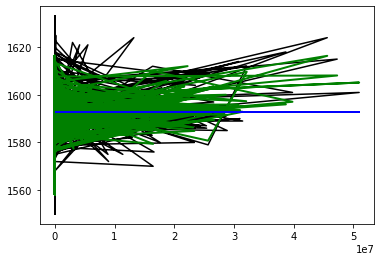

In [98]:
plt.plot(test_x, test_y,  color='black')
plt.plot(test_x, predicted, color='green', linewidth=2)
plt.plot(test_x, y_predict_dummy_mean, color='blue', linestyle = 'dashed', 
         linewidth=2, label = 'dummy')

Вывод:

XGBRegressor оптимально работает под наши данные.

Рассмотрим важность параметров:

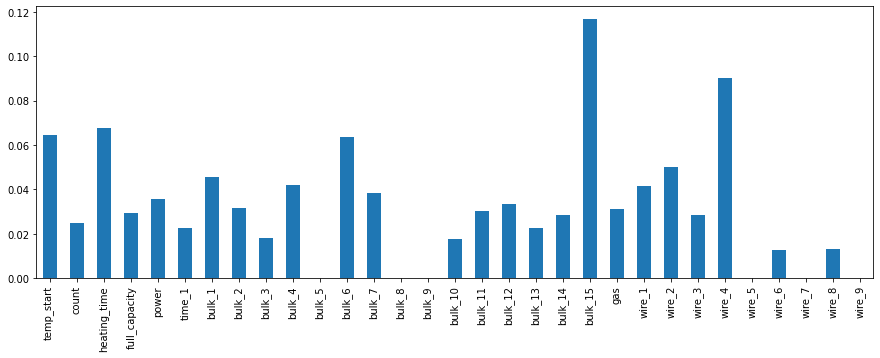

In [99]:
features = pd.Series(xgb_random.best_estimator_.feature_importances_, index=train_x.columns)

plt.figure(figsize=(15,5))
features.plot.bar()
plt.show()

Как видно из графика, для итоговой метрики наиболее важны параметры:

Время нагрева, данные bulk_15 и wire_4.

Заказчику стоит обратить внимание на данные параметры, так как они наиболее сильно влияют на конечную температуру.

# Вывод:

1.Рассмотрел следующие модели: дерево решений, случайный лес, lightGBM, XGBoost, CatBoost.

2.Из полученных моделей наилучше всего показала себя модель XGBRegressor с параметрами learning_rate: 0.1, max_depth: 4.

3.Провел оценку лучшей модели на тестовой выборке, итоговая метрика 6.24 - модель можно использовать.

4.Заказчику стоит обратить внимание на первое измерение температуры, время нагрева, данные bulk_15 и wire_4, так как они наиболее сильно влияют на конечную температуру.

# Отчет по решению

# 1.Какие пункты плана были выполнены, а какие — нет (поясните почему)?

Первоначальный план выглядел так:

1.Подготовить данные (типы данных, аномалии, пропуски).

2.Подготовка признаков (составление единой таблицы со всеми данными, выделение целевого признака).

3.Выбор моделей.

4.Оценка лучшей модели на тестовой выборке.

Все пункты плана были выполнены. 

# 2.Какие трудности возникли и как вы их преодолели?

Основные трудности:

- выбор данных для нашей модели и то, как агрегировать данные;

Решая это, я узнал больше о различных этапах обработки стали, и, благодаря этому, я смог отсеять менее важные данные, такие как: активная и реактивная мощность (заменив на расчетные полная мощность (full_capacity) и затраченная энергия(power). Так же, убрав временные данные, я получил расчетами время нагрева(heating_time), длительность от начала всего процесса плавки до конца каждой партии (time_1).

- недостаточное количество параметров;

Расчитал дополнительные параметры: количество интераций в партии(count), температуру старта партии (temp_start) и конечную температуру партии (temp_end).


# 3.Какие ключевые шаги в решении задачи выделили?

Ключевые шаги: 

- предобработка данных, удаление аномалий — отрицательной реактивной мощности и начальных температур < 1500 градусов. 

- сбор всех данных воедино (объединение в одну таблицу),составлена матрица корреляции, составлен итоговый датасет.
 
- расчет новых параметров, выделен целевой признак - конечная температура. 

- данные разделены на обучающую и тестовую выборки в соотношении 75/25, признаки отмасштаброваны, подобраны модели. 
Выбрали лучшую модель и проверили на тестовой выборке. 

# 4.Какие признаки использовали для обучения модели и какая предобработка этих признаков была выполнена.

Итоговый датасет состоит: из 32 признаков и 2166 строк.
   
 1   temp_start - начальная температура(Вычление из всех плавок данные по первому измерению)      
 2   count - количество интераций в партии(в данных об электродах по столбцу 'key' счетаем количество)           
 3   heating_time - время нагрева в секундах('Конец нагрева дугой' - 'Начало нагрева дугой')                 
 4   full_capacity - полная мощность('активная мощность'** 2+'реактивная мощность'** 2)** 0.5)                            
 5   power - затраченная энергия ('время нагрева в секундах'* 'полная мощность')             
 6   time_1 - длительность процесса от начала всего процеса плавки до конца каждой партии                              ('Конечное время замера' - 'Начало нагрева дугой')                        
 7   bulk_1 - данные о подачи сыпучих материалов №1(Пропуски заполнили 0)        
 8   bulk_2 - данные о подачи сыпучих материалов №2(Пропуски заполнили 0)       
 9   bulk_3 - данные о подачи сыпучих материалов №3(Пропуски заполнили 0)        
 10  bulk_4 - данные о подачи сыпучих материалов №4(Пропуски заполнили 0)                     
 11  bulk_5 - данные о подачи сыпучих материалов №5(Пропуски заполнили 0)        
 12  bulk_6 - данные о подачи сыпучих материалов №6(Пропуски заполнили 0)        
 13  bulk_7 - данные о подачи сыпучих материалов №7(Пропуски заполнили 0)        
 14  bulk_8 - данные о подачи сыпучих материалов №8(Пропуски заполнили 0)        
 15  bulk_9 - данные о подачи сыпучих материалов №9(Пропуски заполнили 0)        
 16  bulk_10 - данные о подачи сыпучих материалов №10(Пропуски заполнили 0)       
 17  bulk_11 - данные о подачи сыпучих материалов №11(Пропуски заполнили 0)       
 18  bulk_12 - данные о подачи сыпучих материалов №12(Пропуски заполнили 0)      
 19  bulk_13 - данные о подачи сыпучих материалов №13(Пропуски заполнили 0)       
 20  bulk_14 - данные о подачи сыпучих материалов №14(Пропуски заполнили 0)     
 21  bulk_15 - данные о подачи сыпучих материалов №15(Пропуски заполнили 0)                  
 22  gas - данные о продувке сплава газом                                                    
 23  wire_1 - данные о подачи проволочных материалов №1(Пропуски заполнили 0)        
 24  wire_2 - данные о подачи проволочных материалов №2(Пропуски заполнили 0)        
 25  wire_3 - данные о подачи проволочных материалов №3(Пропуски заполнили 0)        
 26  wire_4 - данные о подачи проволочных материалов №4(Пропуски заполнили 0)        
 27  wire_5 - данные о подачи проволочных материалов №5(Пропуски заполнили 0)        
 28  wire_6 - данные о подачи проволочных материалов №6(Пропуски заполнили 0)        
 29  wire_7 - данные о подачи проволочных материалов №7(Пропуски заполнили 0)        
 30  wire_8 - данные о подачи проволочных материалов №8(Пропуски заполнили 0)        
 31  wire_9 - данные о подачи проволочных материалов №9(Пропуски заполнили 0)                        
 32  temp_end - конечна температура (Вычление из всех плавок данные по последним измерениям)

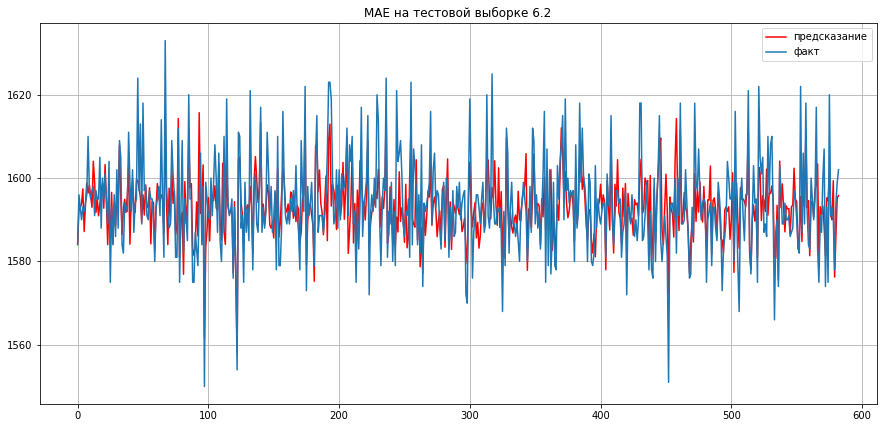

In [102]:
plt.figure(figsize=(15, 7))
plt.plot(predicted, "r", label="предсказание")
plt.plot(test_y.values, label="факт")
plt.legend(loc="best")
plt.title("MAE на тестовой выборке {}".format(round(mean_absolute_error(predicted, test_y), 1)))
plt.grid(True);

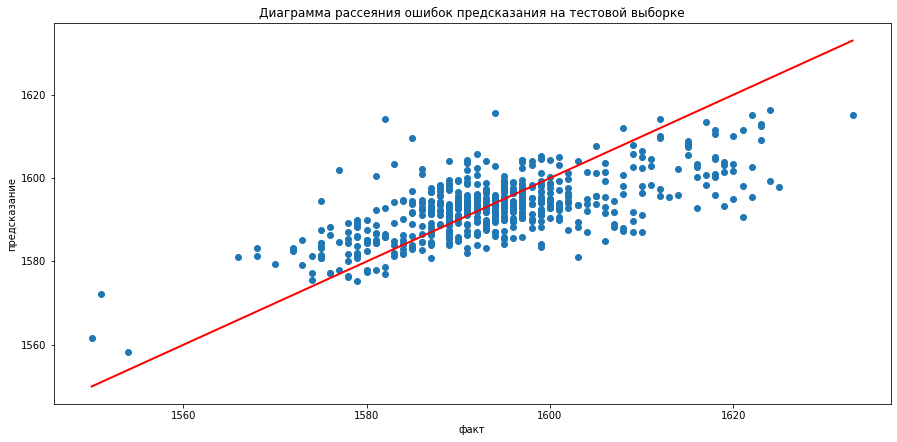

In [104]:
y = test_y.values
fig, ax = plt.subplots(figsize=(15, 7))
ax.scatter(y, predicted)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'r', lw=2)
ax.set_xlabel('факт')
ax.set_ylabel('предсказание')
ax.set_title('Диаграмма рассеяния ошибок предсказания на тестовой выборке')
plt.show()

# 5.Какая ваша итоговая модель, какие у неё гиперпараметры и качество. 

Итоговая модель - XGBRegressor с параметрами learning_rate: 0.1, max_depth: 4. Итоговая метрика модели MAE: 6.24.

Перед запуском XGBRegressor мы должны установить три типа параметров: общие параметры, параметры бустера и параметры задачи.

Гиперпараметры модели:

1.Использовались по умолчянию:                                                               
base_score=None(Первоначальная оценка прогноза всех инстанций, глобальная предвзятость.Параметр автоматически оценивается для выбранных целей перед тренировкой.При достаточном количестве итераций изменение этого значения не будет иметь слишком большого эффекта),                                                
booster='gbtree'(Какой бустер использовать),                                     
colsample_bylevel=None(коэффициент подвыборки столбцов для каждого уровня),                         
colsample_bynode=None(коэффициент подвыборки столбцов для каждого узла (разделение)),                
colsample_bytree=None(коэффициент подвыборки столбцов при построении каждого дерева),                   
enable_categorical=False(разрешение категориальное),                         
gamma=None(гамма-регрессия),                                                    
gpu_id=None(Реализация алгоритма на GPU),                                               
importance_type=None(тип важности),                                            
interaction_constraints=None(Ограничения для взаимодействия, представляющие разрешенные взаимодействия),
max_delta_step=None(Максимальный шаг дельты, Обычно этот параметр не нужен, но он может помочь в логистической регрессии, когда класс крайне несбалансирован),                                         
min_child_weight=None(Минимальная сумма веса экземпляра (гессенская), необходимая ребенку. Если шаг секционирования дерева приводит к конечному узлу с суммой веса экземпляра меньше , то процесс сборки откажется от дальнейшего секционирования. В задаче линейной регрессии это просто соответствует минимальному количеству экземпляров, необходимых для каждого узла. Чем больше, тем консервативнее будет алгоритм.),                                                         
missing=nan(пропуски),                                                      
monotone_constraints=None(Ограничение переменной монотонности),                                      
n_estimators=100(Количество деревьев с увеличенным уклоном. Эквивалентно количеству раундов усиления),            
n_jobs=None(Количество заданий, выполняемых параллельно),                                             
num_parallel_tree=None(число параллельных деревьев),                                    
predictor=None(тип используемого алгоритма предиктора),                                  
reg_alpha=None(термин регуляризации L1 на весах),                                 
reg_lambda=None(термин регуляризации L2 на весах),                                  
scale_pos_weight=None(Контролируйте баланс положительных и отрицательных весов, что полезно для несбалансированных занятий),                                                                     
subsample=None(Коэффициент подвыборки обучающих экземпляров),                              
tree_method=None(Алгоритм построения дерева),                                         
use_rmm=True(для выделения памяти графического процессора),                        
validate_parameters=None(выполнит проверку входных параметров),                             
verbosity=1(Многословие печати сообщений. Допустимые значения: 0 (без звука), 1 (предупреждение), 2 (информация) и 3 (отладка),                                           

2.Подобранные гиперпараметры модели с помощью GridSearchCV при cv=5(5-кратная перекрестнуая проверка(сross-validation generator), scoring='neg_mean_absolute_error'(счетаем МАЕ), verbose=1(Контролирует многословие: чем выше, тем больше сообщений):

learning_rate=0.1 (Ступенчатая усадка размера, используемая при обновлении, чтобы предотвратить переобучение. После каждого шага повышения мы можем напрямую получать веса новых функций и уменьшать весовые коэффициенты функций, чтобы сделать процесс повышения более консервативным. Подбирали:от 0 до 1),                     
max_depth=4 (Максимальная глубина залегания дерева. Увеличение этого значения сделает модель более сложной и более вероятной для переобучения. 0 указывает на отсутствие ограничений по глубине. Подбирали:от 0 до 12),                  
random_state=50623 (ячейка случайного числа, задается чтобы используемое случайное число было постоянным).

# Итоговая модель - XGBRegressor с параметрами learning_rate: 0.1, max_depth: 4. 
# Итоговая метрика модели MAE: 6.24.